# Debugging

This notebook primarily serves to create and debug newer functions acround gathering the weather sensor
data from airports.

This relies on gathering data info, converting airport codes, keeping larger airports,
and downloading the correct files from NOAA's FTP servers.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data/airports.csv')#, skiprows=1)

In [3]:
msk = (df['iso_region']=='US-CA') & (df['type'] == 'medium_airport')
#df[msk]

In [4]:
from util.get_weather_data import make_airport_df
from util.get_weather_data import read_isd_df                                     
from util.get_weather_data import merge_air_isd
from util.get_weather_data import plot_airports
from util.get_weather_data import get_all_data
from util.get_weather_data import convert_state_isd

In [5]:
%load_ext autoreload
%autoreload 2

In [5]:
%pdb off
air_df = make_airport_df()

Automatic pdb calling has been turned OFF


In [6]:
air_df

,name,City,CALL
6225,Aleknagik / New Airport,Aleknagik,5A8
27440,South Alabama Regional At Bill Benton Field Ai...,Andalusia/Opp,K79J
27619,Lehigh Valley International Airport,Allentown,KABE
27620,Abilene Regional Airport,Abilene,KABI
27621,Albuquerque International Sunport,Albuquerque,KABQ
27622,Aberdeen Regional Airport,Aberdeen,KABR
27623,Southwest Georgia Regional Airport,Albany,KABY
27626,Nantucket Memorial Airport,Nantucket,KACK
27629,Waco Regional Airport,Waco,KACT
27630,California Redwood Coast-Humboldt County Airport,Arcata/Eureka,KACV


In [7]:
len(air_df)

857

In [8]:
import matplotlib as mpl
mpl.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "blue"})
#mpl.rcParams['text.color'] = 'white'
#mpl.rcParams['axes.labelcolor'] = 'white'

First up, let's load in the dataframe of weather stations at airports.

In [9]:
isd_df = read_isd_df()

In [10]:
isd_df

,USAF,WBAN,CALL,LAT,LON,ST
2,007026,99999.0,NaN,0.000,0.000,NaN
3,007070,99999.0,NaN,0.000,0.000,NaN
7,008411,99999.0,NaN,NaN,NaN,NaN
8,008414,99999.0,NaN,NaN,NaN,NaN
9,008415,99999.0,NaN,NaN,NaN,NaN
10,008418,99999.0,NaN,NaN,NaN,NaN
12,010010,99999.0,ENJA,70.933,-8.667,NaN
14,010014,99999.0,ENSO,59.792,5.341,NaN
18,010020,99999.0,NaN,80.050,16.250,NaN
19,010030,99999.0,NaN,77.000,15.500,NaN


In [11]:
merge_df = merge_air_isd(air_df, isd_df)

Duplicated values for:
     CALL                City
105  KBYS  Fort Irwin/Barstow
189  KDYS             Abilene
247  KFST       Fort Stockton
333  KILM          Wilmington
387  KLLQ          Monticello
510  KNYL                Yuma
624  KSBD      San Bernardino
719  KUOX              Oxford
742  KXMR         Cocoa Beach
765  PADM            Marshall


In [13]:
merge_df

,name,City,CALL,USAF,WBAN,LAT,LON,ST
0,South Alabama Regional At Bill Benton Field Ai...,Andalusia/Opp,K79J,722275,53843,31.309,-86.394,AL
1,Lehigh Valley International Airport,Allentown,KABE,725170,14737,40.650,-75.448,PA
2,Abilene Regional Airport,Abilene,KABI,722660,13962,32.411,-99.682,TX
3,Albuquerque International Sunport,Albuquerque,KABQ,723650,23050,35.042,-106.616,NM
4,Aberdeen Regional Airport,Aberdeen,KABR,726590,14929,45.443,-98.413,SD
5,Southwest Georgia Regional Airport,Albany,KABY,722160,13869,31.536,-84.194,GA
6,Nantucket Memorial Airport,Nantucket,KACK,725060,14756,41.253,-70.061,MA
7,Waco Regional Airport,Waco,KACT,722560,13959,31.619,-97.228,TX
8,California Redwood Coast-Humboldt County Airport,Arcata/Eureka,KACV,725945,24283,40.978,-124.109,CA
9,Atlantic City International Airport,Atlantic City,KACY,724070,93730,39.452,-74.567,NJ


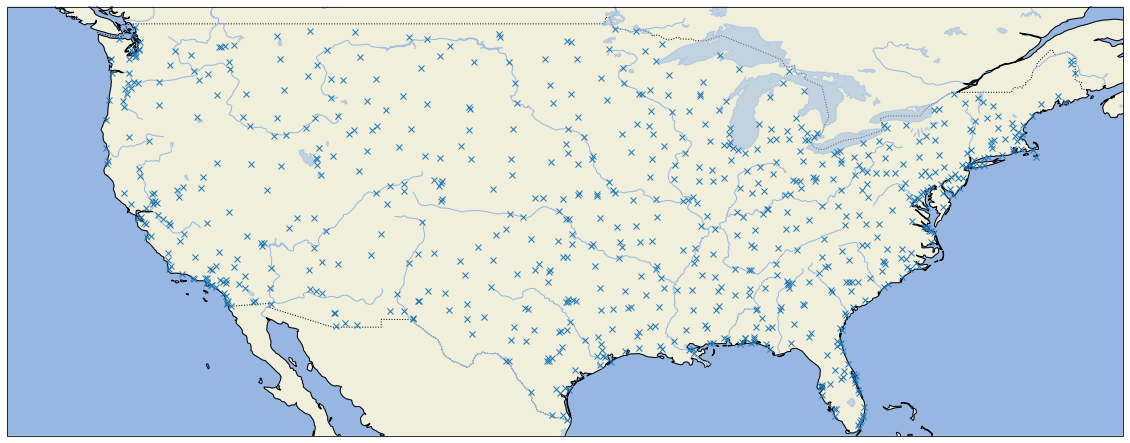

In [14]:
plot_airports(merge_df)

In [15]:
merge_df.iloc[:5]

,name,City,CALL,USAF,WBAN,LAT,LON,ST
0,South Alabama Regional At Bill Benton Field Ai...,Andalusia/Opp,K79J,722275,53843,31.309,-86.394,AL
1,Lehigh Valley International Airport,Allentown,KABE,725170,14737,40.650,-75.448,PA
2,Abilene Regional Airport,Abilene,KABI,722660,13962,32.411,-99.682,TX
3,Albuquerque International Sunport,Albuquerque,KABQ,723650,23050,35.042,-106.616,NM
4,Aberdeen Regional Airport,Aberdeen,KABR,726590,14929,45.443,-98.413,SD


In [18]:
len(merge_df)

844

In [23]:
merge_df.to_csv('data/air_merge_df.csv.gz')

In [ ]:
ls data


## Downloading the Data

The next utilities then download the data from NOAA's FTP server using the merge_df lookup to find the
correct file path.

In [16]:
# Note: very slow. 
%pdb off
get_all_data(merge_df.iloc[:2], 2015, 2016)

Automatic pdb calling has been turned OFF


230-****** WARNING ** WARNING ** WARNING ** WARNING ** WARNING ** ** WARNING ** WARNING ** WARNING ******
 ** You are accessing a U.S. Government information system, which includes:                         **
 ** 1) This computer, 2)This computer network, 3) All computers connected to this network, and      **
 ** 4) All devices and storage media attached to this network or to a computer on this network.     **
 ** You understand and consent to the following:                                                    **
 ** you may access this information system for authorized use only; you have no reasonable          **
 ** expectation of privacy regarding any communication of data transiting or stored on this         **
 ** information system; at any time and for any lawful Government purpose, the Government may       **
 ** monitor, intercept, and search and seize any communication or data transiting or stored on      **
 ** this information system; and any communications or data transiting

  0%|          | 0/2 [00:00<?, ?it/s]

/pub/data/noaa/isd-lite/2015


 50%|█████     | 1/2 [00:02<00:02,  2.16s/it]

/pub/data/noaa/isd-lite/2015


100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

100%|██████████| 2/2 [00:03<00:00,  1.83s/it]

In [17]:
%pdb on
convert_state_isd(merge_df, 'OR')

Automatic pdb calling has been turned ON


/mnt/BigDisk3TB/Data_Science/US-Electricity/util/get_weather_data.py:370: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  Tindex = pd.DatetimeIndex(start='2015-07', end='2017-11', freq='h')
/home/jonathan/.local/lib/python3.6/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


done with Astoria Regional Airport


done with Baker City Municipal Airport


done with Burns Municipal Airport


done with Corvallis Municipal Airport


done with Mahlon Sweet Field


done with Portland Hillsboro Airport


done with Crater Lake-Klamath Regional Airport


done with Rogue Valley International Medford Airport


done with Mc Minnville Municipal Airport


done with Newport Municipal Airport


done with Southwest Oregon Regional Airport


done with Eastern Oregon Regional At Pendleton Airport


done with Portland International Airport


done with Roberts Field


done with Salem Municipal Airport/McNary Field


done with Portland Troutdale Airport


done with Aurora State Airport


,CloudCover,DewTemp,Precip-1hr,Precip-6hr,Pressure,Temp,WindDir,WindSpeed,city,"city, state",region,state
2015-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
import os

In [86]:
from util.get_weather_data import get_missing_data

In [88]:
get_missing_data(merge_df, start_year=2015, end_year=2021)

  0%|          | 0/844 [00:00<?, ?it/s]

230-****** WARNING ** WARNING ** WARNING ** WARNING ** WARNING ** ** WARNING ** WARNING ** WARNING ******
 ** You are accessing a U.S. Government information system, which includes:                         **
 ** 1) This computer, 2)This computer network, 3) All computers connected to this network, and      **
 ** 4) All devices and storage media attached to this network or to a computer on this network.     **
 ** You understand and consent to the following:                                                    **
 ** you may access this information system for authorized use only; you have no reasonable          **
 ** expectation of privacy regarding any communication of data transiting or stored on this         **
 ** information system; at any time and for any lawful Government purpose, the Government may       **
 ** monitor, intercept, and search and seize any communication or data transiting or stored on      **
 ** this information system; and any communications or data transiting

 66%|██████▌   | 553/844 [00:00<00:00, 5526.36it/s]

100%|██████████| 844/844 [00:00<00:00, 5601.31it/s]

  0%|          | 0/844 [00:00<?, ?it/s]

 65%|██████▍   | 545/844 [00:00<00:00, 5442.60it/s]

100%|██████████| 844/844 [00:00<00:00, 5556.07it/s]

  0%|          | 0/844 [00:00<?, ?it/s]

 67%|██████▋   | 563/844 [00:00<00:00, 5617.99it/s]

100%|██████████| 844/844 [00:00<00:00, 5441.50it/s]

  0%|          | 0/844 [00:00<?, ?it/s]

 71%|███████   | 596/844 [00:00<00:00, 5958.23it/s]

100%|██████████| 844/844 [00:00<00:00, 5909.25it/s]

  0%|          | 0/844 [00:00<?, ?it/s]

 65%|██████▌   | 549/844 [00:00<00:00, 5488.19it/s]

100%|██████████| 844/844 [00:00<00:00, 5570.64it/s]

  0%|          | 0/844 [00:00<?, ?it/s]

data/ISD/722287-13871-2020.gz missing for Anniston Regional Airport
/pub/data/noaa/isd-lite/2020


  3%|▎         | 26/844 [00:01<00:55, 14.85it/s]

data/ISD/723190-93846-2020.gz missing for Anderson Regional Airport
/pub/data/noaa/isd-lite/2020


  3%|▎         | 27/844 [00:03<08:33,  1.59it/s]

data/ISD/725126-14736-2020.gz missing for Altoona Blair County Airport
/pub/data/noaa/isd-lite/2020


  3%|▎         | 28/844 [00:05<14:44,  1.08s/it]

data/ISD/724666-93067-2020.gz missing for Centennial Airport


/pub/data/noaa/isd-lite/2020


  3%|▎         | 29/844 [00:07<19:04,  1.40s/it]

data/ISD/722038-12897-2020.gz missing for Naples Municipal Airport


/pub/data/noaa/isd-lite/2020


  4%|▎         | 30/844 [00:09<21:15,  1.57s/it]

data/ISD/724057-13701-2020.gz missing for Phillips Army Air Field


/pub/data/noaa/isd-lite/2020


  4%|▎         | 31/844 [00:11<23:10,  1.71s/it]

data/ISD/726390-94849-2020.gz missing for Alpena County Regional Airport


/pub/data/noaa/isd-lite/2020


  4%|▍         | 32/844 [00:14<24:56,  1.84s/it]

data/ISD/722314-53915-2020.gz missing for Acadiana Regional Airport


/pub/data/noaa/isd-lite/2020


  4%|▍         | 33/844 [00:16<25:19,  1.87s/it]

data/ISD/726227-94790-2020.gz missing for Watertown International Airport
/pub/data/noaa/isd-lite/2020


  4%|▍         | 34/844 [00:17<25:08,  1.86s/it]

data/ISD/724676-93073-2020.gz missing for Aspen-Pitkin Co/Sardy Field


/pub/data/noaa/isd-lite/2020


  4%|▍         | 35/844 [00:20<26:18,  1.95s/it]

data/ISD/727910-94224-2020.gz missing for Astoria Regional Airport
/pub/data/noaa/isd-lite/2020


  4%|▍         | 36/844 [00:22<26:41,  1.98s/it]

data/ISD/722190-13874-2020.gz missing for Hartsfield Jackson Atlanta International Airport
/pub/data/noaa/isd-lite/2020


  4%|▍         | 37/844 [00:24<26:53,  2.00s/it]

data/ISD/726546-14946-2020.gz missing for Watertown Regional Airport


/pub/data/noaa/isd-lite/2020


  5%|▍         | 38/844 [00:26<27:28,  2.05s/it]

data/ISD/726185-14605-2020.gz missing for Augusta State Airport
/pub/data/noaa/isd-lite/2020


  5%|▍         | 39/844 [00:28<27:27,  2.05s/it]

data/ISD/722540-13904-2020.gz missing for Austin Bergstrom International Airport


/pub/data/noaa/isd-lite/2020


  5%|▍         | 40/844 [00:30<27:50,  2.08s/it]

data/ISD/726463-14897-2020.gz missing for Wausau Downtown Airport


/pub/data/noaa/isd-lite/2020


  5%|▍         | 41/844 [00:32<28:05,  2.10s/it]

data/ISD/723150-03812-2020.gz missing for Asheville Regional Airport


/pub/data/noaa/isd-lite/2020


  5%|▍         | 42/844 [00:34<27:26,  2.05s/it]

data/ISD/725130-14777-2020.gz missing for Wilkes Barre Scranton International Airport


/pub/data/noaa/isd-lite/2020


  5%|▌         | 43/844 [00:36<27:23,  2.05s/it]

data/ISD/726557-14910-2020.gz missing for Chandler Field


/pub/data/noaa/isd-lite/2020


  5%|▌         | 44/844 [00:38<27:20,  2.05s/it]

data/ISD/726357-94815-2020.gz missing for Kalamazoo Battle Creek International Airport


/pub/data/noaa/isd-lite/2020


  5%|▌         | 45/844 [00:40<26:28,  1.99s/it]

data/ISD/724837-93216-2020.gz missing for Beale Air Force Base


/pub/data/noaa/isd-lite/2020


  5%|▌         | 46/844 [00:42<26:16,  1.98s/it]

data/ISD/722485-13944-2020.gz missing for Barksdale Air Force Base


/pub/data/noaa/isd-lite/2020


  6%|▌         | 47/844 [00:44<26:32,  2.00s/it]

data/ISD/744915-14775-2020.gz missing for Westfield-Barnes Regional Airport


/pub/data/noaa/isd-lite/2020


  6%|▌         | 48/844 [00:46<27:06,  2.04s/it]

data/ISD/724363-13803-2020.gz missing for Columbus Municipal Airport
/pub/data/noaa/isd-lite/2020


  6%|▌         | 49/844 [00:47<22:37,  1.71s/it]

data/ISD/723628-93942-2020.gz missing for Curtis Field
/pub/data/noaa/isd-lite/2020


  6%|▌         | 50/844 [00:49<22:18,  1.69s/it]

data/ISD/724756-23159-2020.gz missing for Bryce Canyon Airport


/pub/data/noaa/isd-lite/2020


  6%|▌         | 51/844 [00:51<23:43,  1.79s/it]

data/ISD/727476-94961-2020.gz missing for Baudette International Airport


/pub/data/noaa/isd-lite/2020


  6%|▌         | 52/844 [00:53<25:06,  1.90s/it]

data/ISD/725080-14740-2020.gz missing for Bradley International Airport


/pub/data/noaa/isd-lite/2020


  6%|▋         | 53/844 [00:55<25:38,  1.95s/it]

data/ISD/725040-94702-2020.gz missing for Igor I Sikorsky Memorial Airport


/pub/data/noaa/isd-lite/2020


  6%|▋         | 54/844 [00:57<25:36,  1.95s/it]

data/ISD/725059-14702-2020.gz missing for Laurence G Hanscom Field


/pub/data/noaa/isd-lite/2020


  7%|▋         | 55/844 [00:59<26:23,  2.01s/it]

data/ISD/725266-04751-2020.gz missing for Bradford Regional Airport


/pub/data/noaa/isd-lite/2020


  7%|▋         | 56/844 [01:01<25:22,  1.93s/it]

data/ISD/725660-24028-2020.gz missing for Western Neb. Rgnl/William B. Heilig Airport
/pub/data/noaa/isd-lite/2020


  7%|▋         | 57/844 [01:02<24:07,  1.84s/it]

data/ISD/727935-24234-2020.gz missing for Boeing Field King County International Airport


/pub/data/noaa/isd-lite/2020


  7%|▋         | 58/844 [01:05<24:55,  1.90s/it]

data/ISD/723840-23155-2020.gz missing for Meadows Field
/pub/data/noaa/isd-lite/2020


  7%|▋         | 59/844 [01:06<24:14,  1.85s/it]

data/ISD/722235-13838-2020.gz missing for Mobile Downtown Airport


/pub/data/noaa/isd-lite/2020


  7%|▋         | 60/844 [01:08<24:34,  1.88s/it]

data/ISD/725150-04725-2020.gz missing for Greater Binghamton/Edwin A Link field
/pub/data/noaa/isd-lite/2020


  7%|▋         | 61/844 [01:10<25:12,  1.93s/it]

data/ISD/726070-14606-2020.gz missing for Bangor International Airport


/pub/data/noaa/isd-lite/2020


  7%|▋         | 62/844 [01:12<23:37,  1.81s/it]

data/ISD/726077-14616-2020.gz missing for Hancock County-Bar Harbor Airport
/pub/data/noaa/isd-lite/2020


  7%|▋         | 63/844 [01:14<23:18,  1.79s/it]

data/ISD/722280-13876-2020.gz missing for Birmingham-Shuttlesworth International Airport


/pub/data/noaa/isd-lite/2020


  8%|▊         | 64/844 [01:15<23:53,  1.84s/it]

data/ISD/722704-99999-2020.gz missing for Biggs Army Air Field (Fort Bliss)


/pub/data/noaa/isd-lite/2020


  8%|▊         | 65/844 [01:17<24:17,  1.87s/it]

data/ISD/724800-23157-2020.gz missing for Eastern Sierra Regional Airport


/pub/data/noaa/isd-lite/2020


  8%|▊         | 66/844 [01:20<25:20,  1.95s/it]

data/ISD/726770-24033-2020.gz missing for Billings Logan International Airport


/pub/data/noaa/isd-lite/2020


  8%|▊         | 67/844 [01:22<25:41,  1.98s/it]

data/ISD/727640-24011-2020.gz missing for Bismarck Municipal Airport
/pub/data/noaa/isd-lite/2020


  8%|▊         | 68/844 [01:24<25:53,  2.00s/it]

data/ISD/747686-13820-2020.gz missing for Keesler Air Force Base


/pub/data/noaa/isd-lite/2020


  8%|▊         | 69/844 [01:26<25:38,  1.98s/it]

data/ISD/724699-03065-2020.gz missing for Rocky Mountain Metropolitan Airport


/pub/data/noaa/isd-lite/2020


  8%|▊         | 70/844 [01:27<23:28,  1.82s/it]

data/ISD/727550-14958-2020.gz missing for Bemidji Regional Airport


/pub/data/noaa/isd-lite/2020


  8%|▊         | 71/844 [01:29<24:19,  1.89s/it]

data/ISD/726886-24130-2020.gz missing for Baker City Municipal Airport


/pub/data/noaa/isd-lite/2020


  9%|▊         | 72/844 [01:31<23:43,  1.84s/it]

data/ISD/724695-23036-2020.gz missing for Buckley Air Force Base
/pub/data/noaa/isd-lite/2020


  9%|▊         | 73/844 [01:33<24:53,  1.94s/it]

data/ISD/725245-04853-2020.gz missing for Burke Lakefront Airport
/pub/data/noaa/isd-lite/2020


  9%|▉         | 74/844 [01:35<25:16,  1.97s/it]

data/ISD/724120-03872-2020.gz missing for Raleigh County Memorial Airport


/pub/data/noaa/isd-lite/2020


  9%|▉         | 75/844 [01:37<25:32,  1.99s/it]

data/ISD/724125-03859-2020.gz missing for Mercer County Airport


/pub/data/noaa/isd-lite/2020


  9%|▉         | 76/844 [01:39<26:07,  2.04s/it]

data/ISD/747188-23158-2020.gz missing for Blythe Airport
/pub/data/noaa/isd-lite/2020


  9%|▉         | 77/844 [01:41<25:42,  2.01s/it]

data/ISD/727976-24217-2020.gz missing for Bellingham International Airport
/pub/data/noaa/isd-lite/2020


  9%|▉         | 78/844 [01:43<25:02,  1.96s/it]

data/ISD/724338-13802-2020.gz missing for Scott AFB/Midamerica Airport


/pub/data/noaa/isd-lite/2020


  9%|▉         | 79/844 [01:45<25:00,  1.96s/it]

data/ISD/724375-03893-2020.gz missing for Monroe County Airport
/pub/data/noaa/isd-lite/2020


  9%|▉         | 80/844 [01:47<24:27,  1.92s/it]

data/ISD/724397-54831-2020.gz missing for Central Illinois Regional Airport at Bloomington-Normal


/pub/data/noaa/isd-lite/2020


 10%|▉         | 81/844 [01:49<24:54,  1.96s/it]

data/ISD/723270-13897-2020.gz missing for Nashville International Airport


/pub/data/noaa/isd-lite/2020


 10%|▉         | 82/844 [01:51<25:13,  1.99s/it]

data/ISD/726830-94185-2020.gz missing for Burns Municipal Airport


/pub/data/noaa/isd-lite/2020


 10%|▉         | 83/844 [01:53<25:48,  2.04s/it]

data/ISD/726810-24131-2020.gz missing for Boise Air Terminal/Gowen Field


/pub/data/noaa/isd-lite/2020


 10%|▉         | 84/844 [01:55<25:29,  2.01s/it]

data/ISD/725090-14739-2020.gz missing for General Edward Lawrence Logan International Airport
/pub/data/noaa/isd-lite/2020


 10%|█         | 85/844 [01:57<26:19,  2.08s/it]

data/ISD/726710-24164-2020.gz missing for Miley Memorial Field


/pub/data/noaa/isd-lite/2020


 10%|█         | 86/844 [01:59<26:33,  2.10s/it]

data/ISD/723439-53918-2020.gz missing for Ozark Regional Airport


/pub/data/noaa/isd-lite/2020


 10%|█         | 87/844 [02:01<24:45,  1.96s/it]

data/ISD/722410-12917-2020.gz missing for Southeast Texas Regional Airport


/pub/data/noaa/isd-lite/2020


 10%|█         | 88/844 [02:03<24:19,  1.93s/it]

data/ISD/722136-53883-2020.gz missing for Brunswick Golden Isles Airport
/pub/data/noaa/isd-lite/2020


 11%|█         | 89/844 [02:05<24:18,  1.93s/it]

data/ISD/726555-94938-2020.gz missing for Brainerd Lakes Regional Airport


/pub/data/noaa/isd-lite/2020


 11%|█         | 90/844 [02:07<24:54,  1.98s/it]

data/ISD/725420-14931-2020.gz missing for Southeast Iowa Regional Airport
/pub/data/noaa/isd-lite/2020


 11%|█         | 91/844 [02:09<24:32,  1.96s/it]

data/ISD/722500-12919-2020.gz missing for Brownsville South Padre Island International Airport
/pub/data/noaa/isd-lite/2020


 11%|█         | 92/844 [02:11<23:42,  1.89s/it]

data/ISD/725396-14815-2020.gz missing for Battle Creek Executive Airport at Kellogg Field
/pub/data/noaa/isd-lite/2020


 11%|█         | 93/844 [02:12<22:43,  1.82s/it]

data/ISD/727740-24135-2020.gz missing for Bert Mooney Airport


/pub/data/noaa/isd-lite/2020


 11%|█         | 94/844 [02:14<23:33,  1.89s/it]

data/ISD/722320-13970-2020.gz missing for Baton Rouge Metropolitan Airport


/pub/data/noaa/isd-lite/2020


 11%|█▏        | 95/844 [02:16<23:45,  1.90s/it]

data/ISD/726170-14742-2020.gz missing for Burlington International Airport


/pub/data/noaa/isd-lite/2020


 11%|█▏        | 96/844 [02:18<24:16,  1.95s/it]

data/ISD/725280-14733-2020.gz missing for Buffalo Niagara International Airport


/pub/data/noaa/isd-lite/2020


 11%|█▏        | 97/844 [02:20<23:51,  1.92s/it]

data/ISD/722880-23152-2020.gz missing for Bob Hope Airport


/pub/data/noaa/isd-lite/2020


 12%|█▏        | 98/844 [02:22<23:55,  1.92s/it]

data/ISD/725204-04813-2020.gz missing for Beaver County Airport
/pub/data/noaa/isd-lite/2020


 12%|█▏        | 99/844 [02:24<22:09,  1.78s/it]

data/ISD/725088-54733-2020.gz missing for Beverly Regional Airport
/pub/data/noaa/isd-lite/2020


 12%|█▏        | 100/844 [02:25<20:32,  1.66s/it]

data/ISD/746716-93808-2020.gz missing for Bowling Green Warren County Regional Airport
/pub/data/noaa/isd-lite/2020


 12%|█▏        | 101/844 [02:26<18:53,  1.53s/it]

data/ISD/724060-93721-2020.gz missing for Baltimore/Washington International Thurgood Marshall Airport
/pub/data/noaa/isd-lite/2020


 12%|█▏        | 102/844 [02:27<17:59,  1.45s/it]

data/ISD/723408-13814-2020.gz missing for Arkansas International Airport
/pub/data/noaa/isd-lite/2020


 12%|█▏        | 103/844 [02:28<15:11,  1.23s/it]

data/ISD/725867-24133-2020.gz missing for Burley Municipal Airport
/pub/data/noaa/isd-lite/2020


 12%|█▏        | 104/844 [02:29<15:28,  1.25s/it]

data/ISD/746110-03182-2020.gz missing for Bicycle Lake Army Air Field
/pub/data/noaa/isd-lite/2020


 12%|█▏        | 105/844 [02:31<17:24,  1.41s/it]

data/ISD/726797-24132-2020.gz missing for Gallatin Field
/pub/data/noaa/isd-lite/2020


 13%|█▎        | 106/844 [02:33<17:10,  1.40s/it]

data/ISD/723100-13883-2020.gz missing for Columbia Metropolitan Airport
/pub/data/noaa/isd-lite/2020


 13%|█▎        | 107/844 [02:34<17:05,  1.39s/it]

data/ISD/725210-14895-2020.gz missing for Akron Canton Regional Airport


/pub/data/noaa/isd-lite/2020


 13%|█▎        | 108/844 [02:35<17:42,  1.44s/it]

data/ISD/727120-14607-2020.gz missing for Caribou Municipal Airport
/pub/data/noaa/isd-lite/2020


 13%|█▎        | 109/844 [02:37<17:35,  1.44s/it]

data/ISD/723306-13825-2020.gz missing for Columbus Air Force Base
/pub/data/noaa/isd-lite/2020


 13%|█▎        | 110/844 [02:38<17:33,  1.44s/it]

data/ISD/725463-14966-2020.gz missing for Northeast Iowa Regional Airport
/pub/data/noaa/isd-lite/2020


 13%|█▎        | 111/844 [02:40<16:54,  1.38s/it]

data/ISD/724755-93129-2020.gz missing for Cedar City Regional Airport
/pub/data/noaa/isd-lite/2020


 13%|█▎        | 112/844 [02:41<16:32,  1.36s/it]

data/ISD/725636-24017-2020.gz missing for Chadron Municipal Airport
/pub/data/noaa/isd-lite/2020


 13%|█▎        | 113/844 [02:42<16:27,  1.35s/it]

data/ISD/723660-23007-2020.gz missing for Childress Municipal Airport
/pub/data/noaa/isd-lite/2020


 14%|█▎        | 114/844 [02:44<16:10,  1.33s/it]

data/ISD/725946-24286-2020.gz missing for Jack Mc Namara Field Airport
/pub/data/noaa/isd-lite/2020


 14%|█▎        | 115/844 [02:45<15:36,  1.28s/it]

data/ISD/744910-14703-2020.gz missing for Westover ARB/Metropolitan Airport


/pub/data/noaa/isd-lite/2020


 14%|█▎        | 116/844 [02:47<17:59,  1.48s/it]

data/ISD/722215-13884-2020.gz missing for Bob Sikes Airport


/pub/data/noaa/isd-lite/2020


 14%|█▍        | 117/844 [02:48<18:51,  1.56s/it]

data/ISD/725247-04805-2020.gz missing for Cuyahoga County Airport


/pub/data/noaa/isd-lite/2020


 14%|█▍        | 118/844 [02:49<17:18,  1.43s/it]

data/ISD/723290-03935-2020.gz missing for Cape Girardeau Regional Airport
/pub/data/noaa/isd-lite/2020


 14%|█▍        | 119/844 [02:51<18:25,  1.52s/it]

data/ISD/723240-13882-2020.gz missing for Lovell Field
/pub/data/noaa/isd-lite/2020


 14%|█▍        | 120/844 [02:53<18:48,  1.56s/it]

data/ISD/724016-93736-2020.gz missing for Charlottesville Albemarle Airport
/pub/data/noaa/isd-lite/2020


 14%|█▍        | 121/844 [02:55<19:26,  1.61s/it]

data/ISD/722080-13880-2020.gz missing for Charleston Air Force Base-International Airport
/pub/data/noaa/isd-lite/2020


 14%|█▍        | 122/844 [02:56<19:08,  1.59s/it]

data/ISD/725450-14990-2020.gz missing for The Eastern Iowa Airport


/pub/data/noaa/isd-lite/2020


 15%|█▍        | 123/844 [02:58<20:11,  1.68s/it]

data/ISD/727344-04869-2020.gz missing for Chippewa County International Airport
/pub/data/noaa/isd-lite/2020


 15%|█▍        | 124/844 [03:00<19:28,  1.62s/it]

data/ISD/724175-03802-2020.gz missing for North Central West Virginia Airport
/pub/data/noaa/isd-lite/2020


 15%|█▍        | 125/844 [03:01<19:52,  1.66s/it]

data/ISD/725240-14820-2020.gz missing for Cleveland Hopkins International Airport


/pub/data/noaa/isd-lite/2020


 15%|█▍        | 126/844 [03:03<21:36,  1.81s/it]

data/ISD/747460-03904-2020.gz missing for Easterwood Field
/pub/data/noaa/isd-lite/2020


 15%|█▌        | 127/844 [03:05<20:14,  1.69s/it]

data/ISD/727885-94266-2020.gz missing for William R Fairchild International Airport


/pub/data/noaa/isd-lite/2020


 15%|█▌        | 128/844 [03:07<20:45,  1.74s/it]

data/ISD/723140-13881-2020.gz missing for Charlotte Douglas International Airport
/pub/data/noaa/isd-lite/2020


 15%|█▌        | 129/844 [03:08<20:44,  1.74s/it]

data/ISD/724280-14821-2020.gz missing for John Glenn Columbus International Airport
/pub/data/noaa/isd-lite/2020


 15%|█▌        | 130/844 [03:10<20:02,  1.68s/it]

data/ISD/725315-94870-2020.gz missing for University of Illinois Willard Airport
/pub/data/noaa/isd-lite/2020


 16%|█▌        | 131/844 [03:12<19:24,  1.63s/it]

data/ISD/727440-14858-2020.gz missing for Houghton County Memorial Airport


/pub/data/noaa/isd-lite/2020


 16%|█▌        | 132/844 [03:14<21:13,  1.79s/it]

data/ISD/722687-93033-2020.gz missing for Cavern City Air Terminal
/pub/data/noaa/isd-lite/2020


 16%|█▌        | 133/844 [03:16<21:48,  1.84s/it]

data/ISD/724507-13981-2020.gz missing for Chanute Martin Johnson Airport
/pub/data/noaa/isd-lite/2020


 16%|█▌        | 134/844 [03:17<21:22,  1.81s/it]

data/ISD/726700-24045-2020.gz missing for Yellowstone Regional Airport


/pub/data/noaa/isd-lite/2020


 16%|█▌        | 135/844 [03:19<21:03,  1.78s/it]

data/ISD/727834-24136-2020.gz missing for Coeur D'Alene - Pappy Boyington Field
/pub/data/noaa/isd-lite/2020


 16%|█▌        | 136/844 [03:21<20:12,  1.71s/it]

data/ISD/747950-12867-2020.gz missing for Patrick Air Force Base
/pub/data/noaa/isd-lite/2020


 16%|█▌        | 137/844 [03:23<21:00,  1.78s/it]

data/ISD/726050-14745-2020.gz missing for Concord Municipal Airport


/pub/data/noaa/isd-lite/2020


 16%|█▋        | 138/844 [03:24<20:18,  1.73s/it]

data/ISD/724660-93037-2020.gz missing for City of Colorado Springs Municipal Airport
/pub/data/noaa/isd-lite/2020


 16%|█▋        | 139/844 [03:26<20:07,  1.71s/it]

data/ISD/724450-03945-2020.gz missing for Columbia Regional Airport


/pub/data/noaa/isd-lite/2020


 17%|█▋        | 140/844 [03:27<19:50,  1.69s/it]

data/ISD/725690-24089-2020.gz missing for Casper-Natrona County International Airport


/pub/data/noaa/isd-lite/2020


 17%|█▋        | 141/844 [03:29<19:40,  1.68s/it]

data/ISD/747915-93718-2020.gz missing for Grand Strand Airport
/pub/data/noaa/isd-lite/2020


 17%|█▋        | 142/844 [03:31<18:51,  1.61s/it]

data/ISD/747820-53860-2020.gz missing for Jacksonville Executive at Craig Airport
/pub/data/noaa/isd-lite/2020


 17%|█▋        | 143/844 [03:32<19:09,  1.64s/it]

data/ISD/722510-12924-2020.gz missing for Corpus Christi International Airport


/pub/data/noaa/isd-lite/2020


 17%|█▋        | 144/844 [03:34<19:53,  1.71s/it]

data/ISD/722927-03177-2020.gz missing for Mc Clellan-Palomar Airport
/pub/data/noaa/isd-lite/2020


 17%|█▋        | 145/844 [03:36<19:35,  1.68s/it]

data/ISD/724140-13866-2020.gz missing for Yeager Airport


/pub/data/noaa/isd-lite/2020


 17%|█▋        | 146/844 [03:38<20:42,  1.78s/it]

data/ISD/722255-93842-2020.gz missing for Columbus Metropolitan Airport
/pub/data/noaa/isd-lite/2020


 17%|█▋        | 147/844 [03:39<19:39,  1.69s/it]

data/ISD/723250-03847-2020.gz missing for Crossville Memorial Whitson Field
/pub/data/noaa/isd-lite/2020


 18%|█▊        | 148/844 [03:41<18:39,  1.61s/it]

data/ISD/727690-24137-2020.gz missing for Cut Bank International Airport
/pub/data/noaa/isd-lite/2020


 18%|█▊        | 149/844 [03:42<19:06,  1.65s/it]

data/ISD/723104-53867-2020.gz missing for Jim Hamilton L.B. Owens Airport


/pub/data/noaa/isd-lite/2020


 18%|█▊        | 150/844 [03:44<19:23,  1.68s/it]

data/ISD/724210-93814-2020.gz missing for Cincinnati Northern Kentucky International Airport


/pub/data/noaa/isd-lite/2020


 18%|█▊        | 151/844 [03:46<19:35,  1.70s/it]

data/ISD/726945-24202-2020.gz missing for Corvallis Municipal Airport
/pub/data/noaa/isd-lite/2020


 18%|█▊        | 152/844 [03:48<20:25,  1.77s/it]

data/ISD/722686-23008-2020.gz missing for Cannon Air Force Base


/pub/data/noaa/isd-lite/2020


 18%|█▊        | 153/844 [03:50<20:03,  1.74s/it]

data/ISD/726465-94890-2020.gz missing for Central Wisconsin Airport
/pub/data/noaa/isd-lite/2020


 18%|█▊        | 154/844 [03:51<18:32,  1.61s/it]

data/ISD/722444-53902-2020.gz missing for Conroe-North Houston Regional Airport
/pub/data/noaa/isd-lite/2020


 18%|█▊        | 155/844 [03:53<18:54,  1.65s/it]

data/ISD/725640-24018-2020.gz missing for Cheyenne Regional Jerry Olson Field


/pub/data/noaa/isd-lite/2020


 18%|█▊        | 156/844 [03:55<20:23,  1.78s/it]

data/ISD/724037-93728-2020.gz missing for Davison Army Air Field
/pub/data/noaa/isd-lite/2020


 19%|█▊        | 157/844 [03:57<20:48,  1.82s/it]

data/ISD/747870-12834-2020.gz missing for Daytona Beach International Airport


/pub/data/noaa/isd-lite/2020


 19%|█▊        | 158/844 [03:58<20:10,  1.76s/it]

data/ISD/723815-23161-2020.gz missing for Barstow Daggett Airport
/pub/data/noaa/isd-lite/2020


 19%|█▉        | 159/844 [04:00<18:59,  1.66s/it]

data/ISD/722580-13960-2020.gz missing for Dallas Love Field
/pub/data/noaa/isd-lite/2020


 19%|█▉        | 160/844 [04:01<18:14,  1.60s/it]

data/ISD/724106-13728-2020.gz missing for Danville Regional Airport
/pub/data/noaa/isd-lite/2020


 19%|█▉        | 161/844 [04:03<18:59,  1.67s/it]

data/ISD/724290-93815-2020.gz missing for James M Cox Dayton International Airport


/pub/data/noaa/isd-lite/2020


 19%|█▉        | 162/844 [04:05<20:01,  1.76s/it]

data/ISD/725470-94908-2020.gz missing for Dubuque Regional Airport
/pub/data/noaa/isd-lite/2020


 19%|█▉        | 163/844 [04:06<19:06,  1.68s/it]

data/ISD/724050-13743-2020.gz missing for Ronald Reagan Washington National Airport


/pub/data/noaa/isd-lite/2020


 19%|█▉        | 164/844 [04:08<19:37,  1.73s/it]

data/ISD/724510-13985-2020.gz missing for Dodge City Regional Airport


/pub/data/noaa/isd-lite/2020


 20%|█▉        | 165/844 [04:10<18:21,  1.62s/it]

data/ISD/725316-03887-2020.gz missing for Decatur Airport
/pub/data/noaa/isd-lite/2020


 20%|█▉        | 166/844 [04:11<17:12,  1.52s/it]

data/ISD/725650-03017-2020.gz missing for Denver International Airport
/pub/data/noaa/isd-lite/2020


 20%|█▉        | 167/844 [04:12<16:36,  1.47s/it]

data/ISD/725375-14822-2020.gz missing for Coleman A. Young Municipal Airport
/pub/data/noaa/isd-lite/2020


 20%|█▉        | 168/844 [04:14<18:07,  1.61s/it]

data/ISD/722590-03927-2020.gz missing for Dallas Fort Worth International Airport
/pub/data/noaa/isd-lite/2020


 20%|██        | 169/844 [04:16<19:14,  1.71s/it]

data/ISD/722268-13839-2020.gz missing for Dothan Regional Airport


/pub/data/noaa/isd-lite/2020


 20%|██        | 170/844 [04:17<18:02,  1.61s/it]

data/ISD/747360-93042-2020.gz missing for Dalhart Municipal Airport
/pub/data/noaa/isd-lite/2020


 20%|██        | 171/844 [04:19<17:19,  1.54s/it]

data/ISD/727630-24012-2020.gz missing for Dickinson Theodore Roosevelt Regional Airport


/pub/data/noaa/isd-lite/2020


 20%|██        | 172/844 [04:21<17:32,  1.57s/it]

data/ISD/722615-22001-2020.gz missing for DLF Airport


/pub/data/noaa/isd-lite/2020


 20%|██        | 173/844 [04:22<18:30,  1.65s/it]

data/ISD/727450-14913-2020.gz missing for Duluth International Airport
/pub/data/noaa/isd-lite/2020


 21%|██        | 174/844 [04:24<18:26,  1.65s/it]

data/ISD/726988-24219-2020.gz missing for Columbia Gorge Regional the Dalles Municipal Airport
/pub/data/noaa/isd-lite/2020


 21%|██        | 175/844 [04:25<17:41,  1.59s/it]

data/ISD/722745-23109-2020.gz missing for Davis Monthan Air Force Base
/pub/data/noaa/isd-lite/2020


 21%|██        | 176/844 [04:27<19:11,  1.72s/it]

data/ISD/722725-23078-2020.gz missing for Deming Municipal Airport


/pub/data/noaa/isd-lite/2020


 21%|██        | 177/844 [04:29<19:34,  1.76s/it]

data/ISD/722181-13837-2020.gz missing for Daniel Field


/pub/data/noaa/isd-lite/2020


 21%|██        | 178/844 [04:31<18:47,  1.69s/it]

data/ISD/724088-13707-2020.gz missing for Dover Air Force Base


/pub/data/noaa/isd-lite/2020


 21%|██        | 179/844 [04:33<19:56,  1.80s/it]

data/ISD/725305-94892-2020.gz missing for Dupage Airport
/pub/data/noaa/isd-lite/2020


 21%|██▏       | 180/844 [04:35<19:43,  1.78s/it]

data/ISD/723870-03160-2020.gz missing for Desert Rock Airport


/pub/data/noaa/isd-lite/2020


 21%|██▏       | 181/844 [04:37<20:34,  1.86s/it]

data/ISD/722334-03976-2020.gz missing for Beauregard Regional Airport


/pub/data/noaa/isd-lite/2020


 22%|██▏       | 182/844 [04:38<19:48,  1.79s/it]

data/ISD/722610-22010-2020.gz missing for Del Rio International Airport


/pub/data/noaa/isd-lite/2020


 22%|██▏       | 183/844 [04:40<20:36,  1.87s/it]

data/ISD/725460-14933-2020.gz missing for Des Moines International Airport
/pub/data/noaa/isd-lite/2020


 22%|██▏       | 184/844 [04:42<19:51,  1.81s/it]

data/ISD/725370-94847-2020.gz missing for Detroit Metropolitan Wayne County Airport
/pub/data/noaa/isd-lite/2020


 22%|██▏       | 185/844 [04:44<20:14,  1.84s/it]

data/ISD/722720-93026-2020.gz missing for Bisbee Douglas International Airport


/pub/data/noaa/isd-lite/2020


 22%|██▏       | 186/844 [04:45<18:31,  1.69s/it]

data/ISD/725125-04787-2020.gz missing for DuBois Regional Airport


/pub/data/noaa/isd-lite/2020


 22%|██▏       | 187/844 [04:47<18:28,  1.69s/it]

data/ISD/720965-13910-2020.gz missing for Dyess Air Force Base
/pub/data/noaa/isd-lite/2020


 22%|██▏       | 188/844 [04:48<17:48,  1.63s/it]

data/ISD/727825-94239-2020.gz missing for Pangborn Memorial Airport
/pub/data/noaa/isd-lite/2020


 22%|██▏       | 189/844 [04:50<17:08,  1.57s/it]

data/ISD/726435-14991-2020.gz missing for Chippewa Valley Regional Airport


/pub/data/noaa/isd-lite/2020


 23%|██▎       | 190/844 [04:52<17:40,  1.62s/it]

data/ISD/723070-13786-2020.gz missing for Elizabeth City Regional Airport & Coast Guard Air Station
/pub/data/noaa/isd-lite/2020


 23%|██▎       | 191/844 [04:54<18:22,  1.69s/it]

data/ISD/720735-73805-2020.gz missing for Northwest Florida Beaches International Airport


/pub/data/noaa/isd-lite/2020


 23%|██▎       | 192/844 [04:55<17:30,  1.61s/it]

data/ISD/723810-23114-2020.gz missing for Edwards Air Force Base
/pub/data/noaa/isd-lite/2020


 23%|██▎       | 193/844 [04:57<17:39,  1.63s/it]

data/ISD/723805-23179-2020.gz missing for Needles Airport
/pub/data/noaa/isd-lite/2020


 23%|██▎       | 194/844 [04:58<17:17,  1.60s/it]

data/ISD/726165-94721-2020.gz missing for Dillant Hopkins Airport
/pub/data/noaa/isd-lite/2020


 23%|██▎       | 195/844 [05:00<17:41,  1.64s/it]

data/ISD/722300-53864-2020.gz missing for Shelby County Airport


/pub/data/noaa/isd-lite/2020


 23%|██▎       | 196/844 [05:02<18:23,  1.70s/it]

data/ISD/722436-12906-2020.gz missing for Ellington Airport
/pub/data/noaa/isd-lite/2020


 23%|██▎       | 197/844 [05:03<17:28,  1.62s/it]

data/ISD/724675-23063-2020.gz missing for Eagle County Regional Airport
/pub/data/noaa/isd-lite/2020


 23%|██▎       | 198/844 [05:05<16:56,  1.57s/it]

data/ISD/722246-03844-2020.gz missing for Duke Field
/pub/data/noaa/isd-lite/2020


 24%|██▎       | 199/844 [05:07<18:38,  1.73s/it]

data/ISD/725940-24213-2020.gz missing for Murray Field
/pub/data/noaa/isd-lite/2020


 24%|██▎       | 200/844 [05:08<15:55,  1.48s/it]

data/ISD/724170-13729-2020.gz missing for Elkins-Randolph Co-Jennings Randolph Field


/pub/data/noaa/isd-lite/2020


 24%|██▍       | 201/844 [05:09<16:15,  1.52s/it]

data/ISD/725825-24121-2020.gz missing for Elko Regional Airport
/pub/data/noaa/isd-lite/2020


 24%|██▍       | 202/844 [05:11<18:29,  1.73s/it]

data/ISD/723419-93992-2020.gz missing for South Arkansas Regional At Goodwin Field
/pub/data/noaa/isd-lite/2020


 24%|██▍       | 203/844 [05:13<19:09,  1.79s/it]

data/ISD/725156-14748-2020.gz missing for Elmira Corning Regional Airport
/pub/data/noaa/isd-lite/2020


 24%|██▍       | 204/844 [05:15<19:16,  1.81s/it]

data/ISD/727459-94964-2020.gz missing for Ely Municipal Airport
/pub/data/noaa/isd-lite/2020


 24%|██▍       | 205/844 [05:16<17:32,  1.65s/it]

data/ISD/722700-23044-2020.gz missing for El Paso International Airport
/pub/data/noaa/isd-lite/2020


 24%|██▍       | 206/844 [05:18<16:51,  1.59s/it]

data/ISD/724860-23154-2020.gz missing for Ely Airport Yelland Field
/pub/data/noaa/isd-lite/2020


 25%|██▍       | 207/844 [05:19<16:33,  1.56s/it]

data/ISD/723535-13909-2020.gz missing for Vance Air Force Base
/pub/data/noaa/isd-lite/2020


 25%|██▍       | 208/844 [05:21<17:27,  1.65s/it]

data/ISD/725810-24193-2020.gz missing for Wendover Airport
/pub/data/noaa/isd-lite/2020


 25%|██▍       | 209/844 [05:23<18:02,  1.70s/it]

data/ISD/726505-04845-2020.gz missing for Kenosha Regional Airport
/pub/data/noaa/isd-lite/2020


 25%|██▍       | 210/844 [05:25<18:43,  1.77s/it]

data/ISD/725260-14860-2020.gz missing for Erie International Tom Ridge Field


/pub/data/noaa/isd-lite/2020


 25%|██▌       | 211/844 [05:27<17:56,  1.70s/it]

data/ISD/722487-13935-2020.gz missing for Esler Regional Airport


/pub/data/noaa/isd-lite/2020


 25%|██▌       | 212/844 [05:28<17:33,  1.67s/it]

data/ISD/726930-24221-2020.gz missing for Mahlon Sweet Field
/pub/data/noaa/isd-lite/2020


 25%|██▌       | 213/844 [05:30<17:36,  1.67s/it]

data/ISD/724320-93817-2020.gz missing for Evansville Regional Airport


/pub/data/noaa/isd-lite/2020


 25%|██▌       | 214/844 [05:32<17:31,  1.67s/it]

data/ISD/725775-04111-2020.gz missing for Evanston-Uinta County Airport-Burns Field
/pub/data/noaa/isd-lite/2020


 25%|██▌       | 215/844 [05:34<18:40,  1.78s/it]

data/ISD/725065-94726-2020.gz missing for New Bedford Regional Airport
/pub/data/noaa/isd-lite/2020


 26%|██▌       | 216/844 [05:35<18:31,  1.77s/it]

data/ISD/723095-93719-2020.gz missing for Coastal Carolina Regional Airport
/pub/data/noaa/isd-lite/2020


 26%|██▌       | 217/844 [05:37<18:44,  1.79s/it]

data/ISD/725020-14734-2020.gz missing for Newark Liberty International Airport
/pub/data/noaa/isd-lite/2020


 26%|██▌       | 218/844 [05:39<18:09,  1.74s/it]

data/ISD/722010-12836-2020.gz missing for Key West International Airport
/pub/data/noaa/isd-lite/2020


 26%|██▌       | 219/844 [05:41<18:46,  1.80s/it]

data/ISD/723087-93735-2020.gz missing for Felker Army Air Field


/pub/data/noaa/isd-lite/2020


 26%|██▌       | 220/844 [05:43<19:36,  1.89s/it]

data/ISD/727530-14914-2020.gz missing for Hector International Airport
/pub/data/noaa/isd-lite/2020


 26%|██▌       | 221/844 [05:45<19:27,  1.87s/it]

data/ISD/723890-93193-2020.gz missing for Fresno Yosemite International Airport
/pub/data/noaa/isd-lite/2020


 26%|██▋       | 222/844 [05:47<19:32,  1.88s/it]

data/ISD/723035-93740-2020.gz missing for Fayetteville Regional Grannis Field


/pub/data/noaa/isd-lite/2020


 26%|██▋       | 223/844 [05:48<19:05,  1.85s/it]

data/ISD/746930-93737-2020.gz missing for Simmons Army Air Field
/pub/data/noaa/isd-lite/2020


 27%|██▋       | 224/844 [05:50<18:42,  1.81s/it]

data/ISD/724680-94015-2020.gz missing for Butts AAF (Fort Carson) Air Field


/pub/data/noaa/isd-lite/2020


 27%|██▋       | 225/844 [05:52<20:02,  1.94s/it]

data/ISD/725366-14825-2020.gz missing for Findlay Airport


/pub/data/noaa/isd-lite/2020


 27%|██▋       | 226/844 [05:54<20:01,  1.94s/it]

data/ISD/745700-13840-2020.gz missing for Wright-Patterson Air Force Base


/pub/data/noaa/isd-lite/2020


 27%|██▋       | 227/844 [05:56<20:18,  1.98s/it]

data/ISD/722730-03124-2020.gz missing for Sierra Vista Municipal Airport / Libby Army Air Field


/pub/data/noaa/isd-lite/2020


 27%|██▋       | 228/844 [05:58<20:55,  2.04s/it]

data/ISD/725267-94868-2020.gz missing for Venango Regional Airport
/pub/data/noaa/isd-lite/2020


 27%|██▋       | 229/844 [06:00<20:11,  1.97s/it]

data/ISD/723750-03103-2020.gz missing for Flagstaff Pulliam Airport


/pub/data/noaa/isd-lite/2020


 27%|██▋       | 230/844 [06:02<19:45,  1.93s/it]

data/ISD/747830-12849-2020.gz missing for Fort Lauderdale Hollywood International Airport


/pub/data/noaa/isd-lite/2020


 27%|██▋       | 231/844 [06:04<19:08,  1.87s/it]

data/ISD/723106-13744-2020.gz missing for Florence Regional Airport


/pub/data/noaa/isd-lite/2020


 27%|██▋       | 232/844 [06:06<19:29,  1.91s/it]

data/ISD/724065-99999-2020.gz missing for Tipton Airport
/pub/data/noaa/isd-lite/2020


 28%|██▊       | 233/844 [06:07<17:31,  1.72s/it]

data/ISD/723658-23090-2020.gz missing for Four Corners Regional Airport


/pub/data/noaa/isd-lite/2020


 28%|██▊       | 234/844 [06:09<17:25,  1.71s/it]

data/ISD/722106-12835-2020.gz missing for Page Field
/pub/data/noaa/isd-lite/2020


 28%|██▊       | 235/844 [06:11<18:32,  1.83s/it]

data/ISD/726370-14826-2020.gz missing for Bishop International Airport


/pub/data/noaa/isd-lite/2020


 28%|██▊       | 236/844 [06:13<18:34,  1.83s/it]

data/ISD/725490-94933-2020.gz missing for Fort Dodge Regional Airport


/pub/data/noaa/isd-lite/2020


 28%|██▊       | 237/844 [06:15<18:19,  1.81s/it]

data/ISD/724565-13920-2020.gz missing for Topeka Regional Airport - Forbes Field
/pub/data/noaa/isd-lite/2020


 28%|██▊       | 238/844 [06:16<17:55,  1.78s/it]

data/ISD/722103-12895-2020.gz missing for St Lucie County International Airport
/pub/data/noaa/isd-lite/2020


 28%|██▊       | 239/844 [06:18<17:33,  1.74s/it]

data/ISD/744864-54787-2020.gz missing for Republic Airport


/pub/data/noaa/isd-lite/2020


 28%|██▊       | 240/844 [06:20<17:32,  1.74s/it]

data/ISD/724550-13947-2020.gz missing for Marshall Army Air Field
/pub/data/noaa/isd-lite/2020


 29%|██▊       | 241/844 [06:22<18:07,  1.80s/it]

data/ISD/726510-14944-2020.gz missing for Joe Foss Field Airport


/pub/data/noaa/isd-lite/2020


 29%|██▊       | 242/844 [06:23<18:12,  1.82s/it]

data/ISD/723550-13945-2020.gz missing for Henry Post Army Air Field (Fort Sill)


/pub/data/noaa/isd-lite/2020


 29%|██▉       | 243/844 [06:25<17:41,  1.77s/it]

data/ISD/723440-13964-2020.gz missing for Fort Smith Regional Airport
/pub/data/noaa/isd-lite/2020


 29%|██▉       | 244/844 [06:27<18:46,  1.88s/it]

data/ISD/722618-23091-2020.gz missing for Fort Stockton Pecos County Airport


/pub/data/noaa/isd-lite/2020


 29%|██▉       | 245/844 [06:29<18:40,  1.87s/it]

data/ISD/724240-13807-2020.gz missing for Godman Army Air Field
/pub/data/noaa/isd-lite/2020


 29%|██▉       | 246/844 [06:31<17:54,  1.80s/it]

data/ISD/747390-13961-2020.gz missing for Fort Worth Meacham International Airport


/pub/data/noaa/isd-lite/2020


 29%|██▉       | 247/844 [06:33<18:58,  1.91s/it]

data/ISD/722195-03888-2020.gz missing for Fulton County Airport Brown Field
/pub/data/noaa/isd-lite/2020


 29%|██▉       | 248/844 [06:35<19:01,  1.91s/it]

data/ISD/725330-14827-2020.gz missing for Fort Wayne International Airport


/pub/data/noaa/isd-lite/2020


 30%|██▉       | 249/844 [06:37<19:23,  1.95s/it]

data/ISD/722039-12885-2020.gz missing for Fort Lauderdale Executive Airport


/pub/data/noaa/isd-lite/2020


 30%|██▉       | 250/844 [06:39<19:40,  1.99s/it]

data/ISD/723445-93993-2020.gz missing for Drake Field
/pub/data/noaa/isd-lite/2020


 30%|██▉       | 251/844 [06:42<24:22,  2.47s/it]

data/ISD/726650-94023-2020.gz missing for Gillette Campbell County Airport
/pub/data/noaa/isd-lite/2020


 30%|██▉       | 252/844 [06:44<22:08,  2.24s/it]

data/ISD/724515-23064-2020.gz missing for Garden City Regional Airport


/pub/data/noaa/isd-lite/2020


 30%|██▉       | 253/844 [06:46<20:55,  2.12s/it]

data/ISD/723783-03195-2020.gz missing for Grand Canyon National Park Airport


/pub/data/noaa/isd-lite/2020


 30%|███       | 254/844 [06:48<20:24,  2.07s/it]

data/ISD/726676-24087-2020.gz missing for Dawson Community Airport
/pub/data/noaa/isd-lite/2020


 30%|███       | 255/844 [06:50<19:02,  1.94s/it]

data/ISD/727850-24157-2020.gz missing for Spokane International Airport


/pub/data/noaa/isd-lite/2020


 30%|███       | 256/844 [06:52<19:37,  2.00s/it]

data/ISD/727570-14916-2020.gz missing for Grand Forks International Airport


/pub/data/noaa/isd-lite/2020


 30%|███       | 257/844 [06:54<20:01,  2.05s/it]

data/ISD/725220-14750-2020.gz missing for Floyd Bennett Memorial Airport
/pub/data/noaa/isd-lite/2020


 31%|███       | 258/844 [06:56<18:47,  1.92s/it]

data/ISD/722470-03901-2020.gz missing for East Texas Regional Airport


/pub/data/noaa/isd-lite/2020


 31%|███       | 259/844 [06:58<19:07,  1.96s/it]

data/ISD/727680-94008-2020.gz missing for Wokal Field/Glasgow-Valley County Airport


/pub/data/noaa/isd-lite/2020


 31%|███       | 260/844 [07:00<19:03,  1.96s/it]

data/ISD/724760-23066-2020.gz missing for Grand Junction Regional Airport
/pub/data/noaa/isd-lite/2020


 31%|███       | 261/844 [07:01<17:59,  1.85s/it]

data/ISD/724650-23065-2020.gz missing for Renner Field-Goodland Municipal Airport
/pub/data/noaa/isd-lite/2020


 31%|███       | 262/844 [07:03<18:01,  1.86s/it]

data/ISD/747680-13939-2020.gz missing for Mid Delta Regional Airport
/pub/data/noaa/isd-lite/2020


 31%|███       | 263/844 [07:05<18:32,  1.92s/it]

data/ISD/722420-12923-2020.gz missing for Scholes International At Galveston Airport


/pub/data/noaa/isd-lite/2020


 31%|███▏      | 264/844 [07:07<17:42,  1.83s/it]

data/ISD/723119-13886-2020.gz missing for Greenville Downtown Airport


/pub/data/noaa/isd-lite/2020


 31%|███▏      | 265/844 [07:09<18:00,  1.87s/it]

data/ISD/747560-12816-2020.gz missing for Gainesville Regional Airport


/pub/data/noaa/isd-lite/2020


 32%|███▏      | 266/844 [07:10<17:19,  1.80s/it]

data/ISD/725046-14707-2020.gz missing for Groton New London Airport
/pub/data/noaa/isd-lite/2020


 32%|███▏      | 267/844 [07:12<17:25,  1.81s/it]

data/ISD/727790-24146-2020.gz missing for Glacier Park International Airport


/pub/data/noaa/isd-lite/2020


 32%|███▏      | 268/844 [07:14<18:04,  1.88s/it]

data/ISD/747570-93874-2020.gz missing for Gulfport Biloxi International Airport


/pub/data/noaa/isd-lite/2020


 32%|███▏      | 269/844 [07:16<17:57,  1.87s/it]

data/ISD/726450-14898-2020.gz missing for Austin Straubel International Airport
/pub/data/noaa/isd-lite/2020


 32%|███▏      | 270/844 [07:18<17:30,  1.83s/it]

data/ISD/742071-24201-2020.gz missing for Gray Army Air Field
/pub/data/noaa/isd-lite/2020


 32%|███▏      | 271/844 [07:19<16:20,  1.71s/it]

data/ISD/725520-14935-2020.gz missing for Central Nebraska Regional Airport


/pub/data/noaa/isd-lite/2020


 32%|███▏      | 272/844 [07:21<15:31,  1.63s/it]

data/ISD/722576-03902-2020.gz missing for Robert Gray  Army Air Field Airport
/pub/data/noaa/isd-lite/2020


 32%|███▏      | 273/844 [07:22<14:50,  1.56s/it]

data/ISD/726350-94860-2020.gz missing for Gerald R. Ford International Airport
/pub/data/noaa/isd-lite/2020


 32%|███▏      | 274/844 [07:23<14:02,  1.48s/it]

data/ISD/723066-13713-2020.gz missing for Seymour Johnson Air Force Base
/pub/data/noaa/isd-lite/2020


 33%|███▎      | 275/844 [07:25<13:48,  1.46s/it]

data/ISD/723170-13723-2020.gz missing for Piedmont Triad International Airport
/pub/data/noaa/isd-lite/2020


 33%|███▎      | 276/844 [07:26<13:37,  1.44s/it]

data/ISD/723120-03870-2020.gz missing for Greenville Spartanburg International Airport
/pub/data/noaa/isd-lite/2020


 33%|███▎      | 277/844 [07:27<13:08,  1.39s/it]

data/ISD/743700-14715-2020.gz missing for Wheeler Sack Army Air Field
/pub/data/noaa/isd-lite/2020


 33%|███▎      | 278/844 [07:29<13:07,  1.39s/it]

data/ISD/727750-24143-2020.gz missing for Great Falls International Airport
/pub/data/noaa/isd-lite/2020


 33%|███▎      | 279/844 [07:30<13:39,  1.45s/it]

data/ISD/723307-53893-2020.gz missing for Golden Triangle Regional Airport
/pub/data/noaa/isd-lite/2020


 33%|███▎      | 280/844 [07:34<19:30,  2.08s/it]

data/ISD/723627-23081-2020.gz missing for Gallup Municipal Airport


/pub/data/noaa/isd-lite/2020


 33%|███▎      | 281/844 [07:36<18:36,  1.98s/it]

data/ISD/725335-94833-2020.gz missing for Grissom Air Reserve Base
/pub/data/noaa/isd-lite/2020


 33%|███▎      | 282/844 [07:37<16:57,  1.81s/it]

data/ISD/722095-03030-2020.gz missing for Guymon Municipal Airport
/pub/data/noaa/isd-lite/2020


 34%|███▎      | 283/844 [07:39<16:31,  1.77s/it]

data/ISD/747580-13978-2020.gz missing for Greenwood–Leflore Airport


/pub/data/noaa/isd-lite/2020


 34%|███▎      | 284/844 [07:40<15:55,  1.71s/it]

data/ISD/725337-04807-2020.gz missing for Gary Chicago International Airport
/pub/data/noaa/isd-lite/2020


 34%|███▍      | 285/844 [07:41<14:11,  1.52s/it]

data/ISD/747590-13833-2020.gz missing for Hattiesburg Bobby L Chain Municipal Airport


/pub/data/noaa/isd-lite/2020


 34%|███▍      | 286/844 [07:43<14:50,  1.60s/it]

data/ISD/723525-93986-2020.gz missing for Hobart Regional Airport
/pub/data/noaa/isd-lite/2020


 34%|███▍      | 287/844 [07:45<14:20,  1.54s/it]

data/ISD/725087-14752-2020.gz missing for Hartford Brainard Airport
/pub/data/noaa/isd-lite/2020


 34%|███▍      | 288/844 [07:46<14:43,  1.59s/it]

data/ISD/724066-93706-2020.gz missing for Hagerstown Regional Richard A Henson Field
/pub/data/noaa/isd-lite/2020


 34%|███▍      | 289/844 [07:48<15:42,  1.70s/it]

data/ISD/722956-03167-2020.gz missing for Jack Northrop Field Hawthorne Municipal Airport
/pub/data/noaa/isd-lite/2020


 34%|███▍      | 290/844 [07:50<16:43,  1.81s/it]

data/ISD/727455-94931-2020.gz missing for Range Regional Airport
/pub/data/noaa/isd-lite/2020


 34%|███▍      | 291/844 [07:52<16:46,  1.82s/it]

data/ISD/725755-24101-2020.gz missing for Hill Air Force Base


/pub/data/noaa/isd-lite/2020


 35%|███▍      | 292/844 [07:54<16:22,  1.78s/it]

data/ISD/726986-94261-2020.gz missing for Portland Hillsboro Airport
/pub/data/noaa/isd-lite/2020


 35%|███▍      | 293/844 [07:56<16:06,  1.75s/it]

data/ISD/723010-03810-2020.gz missing for Hickory Regional Airport


/pub/data/noaa/isd-lite/2020


 35%|███▍      | 294/844 [07:58<16:53,  1.84s/it]

data/ISD/724275-14894-2020.gz missing for Wheeling Ohio County Airport


/pub/data/noaa/isd-lite/2020


 35%|███▍      | 295/844 [08:00<16:54,  1.85s/it]

data/ISD/727720-24144-2020.gz missing for Helena Regional Airport
/pub/data/noaa/isd-lite/2020


 35%|███▌      | 296/844 [08:01<16:36,  1.82s/it]

data/ISD/722570-03933-2020.gz missing for Hood Army Air Field
/pub/data/noaa/isd-lite/2020


 35%|███▌      | 297/844 [08:04<17:58,  1.97s/it]

data/ISD/747320-23002-2020.gz missing for Holloman Air Force Base
/pub/data/noaa/isd-lite/2020


 35%|███▌      | 298/844 [08:05<17:35,  1.93s/it]

data/ISD/722688-93034-2020.gz missing for Lea County Regional Airport
/pub/data/noaa/isd-lite/2020


 35%|███▌      | 299/844 [08:07<16:28,  1.81s/it]

data/ISD/726540-14936-2020.gz missing for Huron Regional Airport


/pub/data/noaa/isd-lite/2020


 36%|███▌      | 300/844 [08:09<15:58,  1.76s/it]

data/ISD/746710-13806-2020.gz missing for Campbell AAF (Fort Campbell) Air Field


/pub/data/noaa/isd-lite/2020


 36%|███▌      | 301/844 [08:10<15:21,  1.70s/it]

data/ISD/723415-03962-2020.gz missing for Memorial Field
/pub/data/noaa/isd-lite/2020


 36%|███▌      | 302/844 [08:12<15:08,  1.68s/it]

data/ISD/722440-12918-2020.gz missing for William P Hobby Airport
/pub/data/noaa/isd-lite/2020


 36%|███▌      | 303/844 [08:13<15:00,  1.66s/it]

data/ISD/725037-94745-2020.gz missing for Westchester County Airport


/pub/data/noaa/isd-lite/2020


 36%|███▌      | 304/844 [08:15<14:39,  1.63s/it]

data/ISD/727923-94225-2020.gz missing for Bowerman Airport
/pub/data/noaa/isd-lite/2020


 36%|███▌      | 305/844 [08:16<14:21,  1.60s/it]

data/ISD/722505-12904-2020.gz missing for Valley International Airport


/pub/data/noaa/isd-lite/2020


 36%|███▋      | 306/844 [08:18<14:14,  1.59s/it]

data/ISD/723450-13971-2020.gz missing for Boone County Airport
/pub/data/noaa/isd-lite/2020


 36%|███▋      | 307/844 [08:20<14:23,  1.61s/it]

data/ISD/747770-03852-2020.gz missing for Hurlburt Field
/pub/data/noaa/isd-lite/2020


 36%|███▋      | 308/844 [08:21<14:06,  1.58s/it]

data/ISD/722026-12826-2020.gz missing for Homestead ARB Airport
/pub/data/noaa/isd-lite/2020


 37%|███▋      | 309/844 [08:23<14:43,  1.65s/it]

data/ISD/723230-03856-2020.gz missing for Huntsville International Carl T Jones Field


/pub/data/noaa/isd-lite/2020


 37%|███▋      | 310/844 [08:25<15:15,  1.71s/it]

data/ISD/724250-03860-2020.gz missing for Tri-State/Milton J. Ferguson Field
/pub/data/noaa/isd-lite/2020


 37%|███▋      | 311/844 [08:27<14:59,  1.69s/it]

data/ISD/723231-63883-2020.gz missing for Redstone Army Air Field


/pub/data/noaa/isd-lite/2020


 37%|███▋      | 312/844 [08:29<15:58,  1.80s/it]

data/ISD/724373-03868-2020.gz missing for Terre Haute Regional Airport, Hulman Field
/pub/data/noaa/isd-lite/2020


 37%|███▋      | 313/844 [08:30<15:10,  1.72s/it]

data/ISD/727033-14609-2020.gz missing for Houlton International Airport
/pub/data/noaa/isd-lite/2020


 37%|███▋      | 314/844 [08:32<14:40,  1.66s/it]

data/ISD/724506-13986-2020.gz missing for Hutchinson Municipal Airport


/pub/data/noaa/isd-lite/2020


 37%|███▋      | 315/844 [08:34<16:12,  1.84s/it]

data/ISD/725045-14758-2020.gz missing for Tweed New Haven Airport
/pub/data/noaa/isd-lite/2020


 37%|███▋      | 316/844 [08:36<16:11,  1.84s/it]

data/ISD/727770-94012-2020.gz missing for Havre City County Airport
/pub/data/noaa/isd-lite/2020


 38%|███▊      | 317/844 [08:37<15:37,  1.78s/it]

data/ISD/725067-94720-2020.gz missing for Barnstable Municipal Boardman Polando Field


/pub/data/noaa/isd-lite/2020


 38%|███▊      | 318/844 [08:39<15:00,  1.71s/it]

data/ISD/722539-12979-2020.gz missing for San Marcos Regional Airport
/pub/data/noaa/isd-lite/2020


 38%|███▊      | 319/844 [08:40<14:15,  1.63s/it]

data/ISD/726508-94973-2020.gz missing for Sawyer County Airport
/pub/data/noaa/isd-lite/2020


 38%|███▊      | 320/844 [08:42<13:31,  1.55s/it]

data/ISD/724518-03968-2020.gz missing for Hays Regional Airport
/pub/data/noaa/isd-lite/2020


 38%|███▊      | 321/844 [08:43<13:38,  1.56s/it]

data/ISD/724505-03923-2020.gz missing for Mc Connell Air Force Base
/pub/data/noaa/isd-lite/2020


 38%|███▊      | 322/844 [08:45<14:02,  1.61s/it]

data/ISD/724030-93738-2020.gz missing for Washington Dulles International Airport


/pub/data/noaa/isd-lite/2020


 38%|███▊      | 323/844 [08:47<14:40,  1.69s/it]

data/ISD/725287-04724-2020.gz missing for Niagara Falls International Airport
/pub/data/noaa/isd-lite/2020


 38%|███▊      | 324/844 [08:49<14:27,  1.67s/it]

data/ISD/722430-12960-2020.gz missing for George Bush Intercontinental Houston Airport


/pub/data/noaa/isd-lite/2020


 39%|███▊      | 325/844 [08:50<13:54,  1.61s/it]

data/ISD/724500-03928-2020.gz missing for Wichita Eisenhower National Airport
/pub/data/noaa/isd-lite/2020


 39%|███▊      | 326/844 [08:52<14:08,  1.64s/it]

data/ISD/725785-24145-2020.gz missing for Idaho Falls Regional Airport
/pub/data/noaa/isd-lite/2020


 39%|███▊      | 327/844 [08:53<14:22,  1.67s/it]

data/ISD/722127-04880-2020.gz missing for Greater Kankakee Airport


/pub/data/noaa/isd-lite/2020


 39%|███▉      | 328/844 [08:55<14:02,  1.63s/it]

data/ISD/724180-13781-2020.gz missing for New Castle Airport
/pub/data/noaa/isd-lite/2020


 39%|███▉      | 329/844 [08:57<14:15,  1.66s/it]

data/ISD/723020-13748-2020.gz missing for Wilmington International Airport


/pub/data/noaa/isd-lite/2020


 39%|███▉      | 330/844 [08:58<13:57,  1.63s/it]

data/ISD/724296-13841-2020.gz missing for Wilmington Airpark
/pub/data/noaa/isd-lite/2020


 39%|███▉      | 331/844 [09:00<14:07,  1.65s/it]

data/ISD/724380-93819-2020.gz missing for Indianapolis International Airport
/pub/data/noaa/isd-lite/2020


 39%|███▉      | 332/844 [09:02<14:37,  1.71s/it]

data/ISD/722656-23040-2020.gz missing for Winkler County Airport
/pub/data/noaa/isd-lite/2020


 39%|███▉      | 333/844 [09:04<16:31,  1.94s/it]

data/ISD/727470-14918-2020.gz missing for Falls International Airport
/pub/data/noaa/isd-lite/2020


 40%|███▉      | 334/844 [09:06<16:12,  1.91s/it]

data/ISD/723193-93807-2020.gz missing for Smith Reynolds Airport
/pub/data/noaa/isd-lite/2020


 40%|███▉      | 335/844 [09:08<15:19,  1.81s/it]

data/ISD/723740-23194-2020.gz missing for Winslow Lindbergh Regional Airport
/pub/data/noaa/isd-lite/2020


 40%|███▉      | 336/844 [09:09<14:46,  1.75s/it]

data/ISD/747185-03144-2020.gz missing for Imperial County Airport


/pub/data/noaa/isd-lite/2020


 40%|███▉      | 337/844 [09:11<14:46,  1.75s/it]

data/ISD/725140-14778-2020.gz missing for Williamsport Regional Airport
/pub/data/noaa/isd-lite/2020


 40%|████      | 338/844 [09:13<15:12,  1.80s/it]

data/ISD/724455-14938-2020.gz missing for Kirksville Regional Airport
/pub/data/noaa/isd-lite/2020


 40%|████      | 339/844 [09:15<15:33,  1.85s/it]

data/ISD/722011-92813-2020.gz missing for Kissimmee Gateway Airport
/pub/data/noaa/isd-lite/2020


 40%|████      | 340/844 [09:17<15:14,  1.81s/it]

data/ISD/723067-93726-2020.gz missing for Kinston Regional Jetport At Stallings Field
/pub/data/noaa/isd-lite/2020


 40%|████      | 341/844 [09:18<15:03,  1.80s/it]

data/ISD/725050-04781-2020.gz missing for Long Island Mac Arthur Airport
/pub/data/noaa/isd-lite/2020


 41%|████      | 342/844 [09:20<14:13,  1.70s/it]

data/ISD/725155-94761-2020.gz missing for Ithaca Tompkins Regional Airport
/pub/data/noaa/isd-lite/2020


 41%|████      | 343/844 [09:22<14:39,  1.76s/it]

data/ISD/722786-23104-2020.gz missing for Phoenix-Mesa-Gateway Airport


/pub/data/noaa/isd-lite/2020


 41%|████      | 344/844 [09:24<14:35,  1.75s/it]

data/ISD/725776-24166-2020.gz missing for Jackson Hole Airport


/pub/data/noaa/isd-lite/2020


 41%|████      | 345/844 [09:25<14:03,  1.69s/it]

data/ISD/722350-03940-2020.gz missing for Jackson-Medgar Wiley Evers International Airport
/pub/data/noaa/isd-lite/2020


 41%|████      | 346/844 [09:27<14:22,  1.73s/it]

data/ISD/722060-13889-2020.gz missing for Jacksonville International Airport


/pub/data/noaa/isd-lite/2020


 41%|████      | 347/844 [09:29<15:08,  1.83s/it]

data/ISD/723407-03953-2020.gz missing for Jonesboro Municipal Airport
/pub/data/noaa/isd-lite/2020


 41%|████      | 348/844 [09:31<14:23,  1.74s/it]

data/ISD/747400-13973-2020.gz missing for Kimble County Airport


/pub/data/noaa/isd-lite/2020


 41%|████▏     | 349/844 [09:33<15:06,  1.83s/it]

data/ISD/744860-94789-2020.gz missing for John F Kennedy International Airport


/pub/data/noaa/isd-lite/2020


 41%|████▏     | 350/844 [09:35<15:38,  1.90s/it]

data/ISD/725235-04720-2020.gz missing for Chautauqua County-Jamestown Airport
/pub/data/noaa/isd-lite/2020


 42%|████▏     | 351/844 [09:36<15:27,  1.88s/it]

data/ISD/724190-03889-2020.gz missing for Julian Carroll Airport


/pub/data/noaa/isd-lite/2020


 42%|████▏     | 352/844 [09:38<15:35,  1.90s/it]

data/ISD/723495-13987-2020.gz missing for Joplin Regional Airport
/pub/data/noaa/isd-lite/2020


 42%|████▏     | 353/844 [09:40<14:24,  1.76s/it]

data/ISD/727535-14919-2020.gz missing for Jamestown Regional Airport
/pub/data/noaa/isd-lite/2020


 42%|████▏     | 354/844 [09:41<13:57,  1.71s/it]

data/ISD/725127-04726-2020.gz missing for John Murtha Johnstown Cambria County Airport
/pub/data/noaa/isd-lite/2020


 42%|████▏     | 355/844 [09:44<14:52,  1.82s/it]

data/ISD/725395-14833-2020.gz missing for Jackson County Reynolds Field
/pub/data/noaa/isd-lite/2020


 42%|████▏     | 356/844 [09:46<15:23,  1.89s/it]

data/ISD/727924-24223-2020.gz missing for Southwest Washington Regional Airport
/pub/data/noaa/isd-lite/2020


 42%|████▏     | 357/844 [09:47<14:20,  1.77s/it]

data/ISD/724386-14835-2020.gz missing for Purdue University Airport
/pub/data/noaa/isd-lite/2020


 42%|████▏     | 358/844 [09:49<14:23,  1.78s/it]

data/ISD/722119-12883-2020.gz missing for Lakeland Linder International Airport


/pub/data/noaa/isd-lite/2020


 43%|████▎     | 359/844 [09:50<13:31,  1.67s/it]

data/ISD/725390-14836-2020.gz missing for Capital City Airport


/pub/data/noaa/isd-lite/2020


 43%|████▎     | 360/844 [09:52<13:51,  1.72s/it]

data/ISD/725645-24022-2020.gz missing for Laramie Regional Airport
/pub/data/noaa/isd-lite/2020


 43%|████▎     | 361/844 [09:54<13:42,  1.70s/it]

data/ISD/723860-23169-2020.gz missing for McCarran International Airport


/pub/data/noaa/isd-lite/2020


 43%|████▎     | 362/844 [09:56<14:32,  1.81s/it]

data/ISD/723575-03950-2020.gz missing for Lawton Fort Sill Regional Airport
/pub/data/noaa/isd-lite/2020


 43%|████▎     | 363/844 [09:57<13:38,  1.70s/it]

data/ISD/722950-23174-2020.gz missing for Los Angeles International Airport
/pub/data/noaa/isd-lite/2020


 43%|████▎     | 364/844 [09:59<14:09,  1.77s/it]

data/ISD/722670-23042-2020.gz missing for Lubbock Preston Smith International Airport


/pub/data/noaa/isd-lite/2020


 43%|████▎     | 365/844 [10:01<15:00,  1.88s/it]

data/ISD/725207-54735-2020.gz missing for Arnold Palmer Regional Airport


/pub/data/noaa/isd-lite/2020


 43%|████▎     | 366/844 [10:03<14:09,  1.78s/it]

data/ISD/725620-24023-2020.gz missing for North Platte Regional Airport Lee Bird Field


/pub/data/noaa/isd-lite/2020


 43%|████▎     | 367/844 [10:05<14:46,  1.86s/it]

data/ISD/724516-23020-2020.gz missing for Liberal Mid-America Regional Airport


/pub/data/noaa/isd-lite/2020


 44%|████▎     | 368/844 [10:07<14:30,  1.83s/it]

data/ISD/723108-13776-2020.gz missing for Lumberton Regional Airport
/pub/data/noaa/isd-lite/2020


 44%|████▎     | 369/844 [10:07<11:33,  1.46s/it]

Couldn't find info for Lumberton Lumberton Regional Airport 723108-13776-2020.gz
data/ISD/722527-12976-2020.gz missing for Texas Gulf Coast Regional Airport
/pub/data/noaa/isd-lite/2020


 44%|████▍     | 370/844 [10:09<12:55,  1.64s/it]

data/ISD/722400-03937-2020.gz missing for Lake Charles Regional Airport


/pub/data/noaa/isd-lite/2020


 44%|████▍     | 371/844 [10:11<13:10,  1.67s/it]

data/ISD/724285-13812-2020.gz missing for Rickenbacker International Airport
/pub/data/noaa/isd-lite/2020


 44%|████▍     | 372/844 [10:13<13:02,  1.66s/it]

data/ISD/726116-94765-2020.gz missing for Lebanon Municipal Airport


/pub/data/noaa/isd-lite/2020


 44%|████▍     | 373/844 [10:15<14:10,  1.81s/it]

data/ISD/722213-12819-2020.gz missing for Leesburg International Airport


/pub/data/noaa/isd-lite/2020


 44%|████▍     | 374/844 [10:17<14:28,  1.85s/it]

data/ISD/724220-93820-2020.gz missing for Blue Grass Airport


/pub/data/noaa/isd-lite/2020


 44%|████▍     | 375/844 [10:19<14:56,  1.91s/it]

data/ISD/745980-13702-2020.gz missing for Langley Air Force Base
/pub/data/noaa/isd-lite/2020


 45%|████▍     | 376/844 [10:21<15:01,  1.93s/it]

data/ISD/722446-93987-2020.gz missing for Angelina County Airport
/pub/data/noaa/isd-lite/2020


 45%|████▍     | 377/844 [10:22<14:23,  1.85s/it]

data/ISD/722405-13976-2020.gz missing for Lafayette Regional Airport
/pub/data/noaa/isd-lite/2020


 45%|████▍     | 378/844 [10:24<13:29,  1.74s/it]

data/ISD/725030-14732-2020.gz missing for La Guardia Airport


/pub/data/noaa/isd-lite/2020


 45%|████▍     | 379/844 [10:26<14:54,  1.92s/it]

data/ISD/722970-23129-2020.gz missing for Long Beach Airport (Daugherty Field)


/pub/data/noaa/isd-lite/2020


 45%|████▌     | 380/844 [10:28<14:12,  1.84s/it]

data/ISD/724796-94128-2020.gz missing for Logan-Cache Airport


/pub/data/noaa/isd-lite/2020


 45%|████▌     | 381/844 [10:30<14:11,  1.84s/it]

data/ISD/723403-13963-2020.gz missing for Bill & Hillary Clinton National Airport/Adams Field


/pub/data/noaa/isd-lite/2020


 45%|████▌     | 382/844 [10:32<14:18,  1.86s/it]

data/ISD/720175-53919-2020.gz missing for Monticello Municipal Ellis Field
/pub/data/noaa/isd-lite/2020


 45%|████▌     | 383/844 [10:33<13:52,  1.81s/it]

data/ISD/725895-94236-2020.gz missing for Crater Lake-Klamath Regional Airport
/pub/data/noaa/isd-lite/2020


 45%|████▌     | 384/844 [10:35<13:57,  1.82s/it]

data/ISD/725760-24021-2020.gz missing for Hunt Field
/pub/data/noaa/isd-lite/2020


 46%|████▌     | 385/844 [10:37<13:57,  1.82s/it]

data/ISD/725510-14939-2020.gz missing for Lincoln Airport


/pub/data/noaa/isd-lite/2020


 46%|████▌     | 386/844 [10:39<13:52,  1.82s/it]

data/ISD/725116-54737-2020.gz missing for Lancaster Airport
/pub/data/noaa/isd-lite/2020


 46%|████▌     | 387/844 [10:41<13:47,  1.81s/it]

data/ISD/725805-24172-2020.gz missing for Derby Field
/pub/data/noaa/isd-lite/2020


 46%|████▌     | 388/844 [10:43<14:02,  1.85s/it]

data/ISD/724235-13810-2020.gz missing for Bowman Field


/pub/data/noaa/isd-lite/2020


 46%|████▌     | 389/844 [10:44<14:02,  1.85s/it]

data/ISD/724243-03849-2020.gz missing for London-Corbin Airport/Magee Field
/pub/data/noaa/isd-lite/2020


 46%|████▌     | 390/844 [10:47<14:24,  1.90s/it]

data/ISD/722520-12907-2020.gz missing for Laredo International Airport


/pub/data/noaa/isd-lite/2020


 46%|████▋     | 391/844 [10:48<14:28,  1.92s/it]

data/ISD/723405-03930-2020.gz missing for Little Rock Air Force Base


/pub/data/noaa/isd-lite/2020


 46%|████▋     | 392/844 [10:50<14:30,  1.93s/it]

data/ISD/722695-93041-2020.gz missing for Las Cruces International Airport


/pub/data/noaa/isd-lite/2020


 47%|████▋     | 393/844 [10:52<14:31,  1.93s/it]

data/ISD/726430-14920-2020.gz missing for La Crosse Municipal Airport


/pub/data/noaa/isd-lite/2020


 47%|████▋     | 394/844 [10:54<14:31,  1.94s/it]

data/ISD/722250-13829-2020.gz missing for Lawson Army Air Field (Fort Benning)


/pub/data/noaa/isd-lite/2020


 47%|████▋     | 395/844 [10:56<14:44,  1.97s/it]

data/ISD/746140-23112-2020.gz missing for Nellis Air Force Base
/pub/data/noaa/isd-lite/2020


 47%|████▋     | 396/844 [10:58<13:30,  1.81s/it]

data/ISD/723520-13902-2020.gz missing for Altus Air Force Base


/pub/data/noaa/isd-lite/2020


 47%|████▋     | 397/844 [11:00<14:00,  1.88s/it]

data/ISD/722785-23111-2020.gz missing for Luke Air Force Base


/pub/data/noaa/isd-lite/2020


 47%|████▋     | 398/844 [11:02<14:34,  1.96s/it]

data/ISD/724297-93812-2020.gz missing for Cincinnati Municipal Airport Lunken Field


/pub/data/noaa/isd-lite/2020


 47%|████▋     | 399/844 [11:04<14:30,  1.96s/it]

data/ISD/726798-24150-2020.gz missing for Mission Field


/pub/data/noaa/isd-lite/2020


 47%|████▋     | 400/844 [11:06<14:40,  1.98s/it]

data/ISD/723677-23054-2020.gz missing for Las Vegas Municipal Airport


/pub/data/noaa/isd-lite/2020


 48%|████▊     | 401/844 [11:08<14:47,  2.00s/it]

data/ISD/724127-53801-2020.gz missing for Greenbrier Valley Airport


/pub/data/noaa/isd-lite/2020


 48%|████▊     | 402/844 [11:10<13:59,  1.90s/it]

data/ISD/744904-94723-2020.gz missing for Lawrence Municipal Airport
/pub/data/noaa/isd-lite/2020


 48%|████▊     | 403/844 [11:12<14:28,  1.97s/it]

data/ISD/727830-24149-2020.gz missing for Lewiston Nez Perce County Airport
/pub/data/noaa/isd-lite/2020


 48%|████▊     | 404/844 [11:14<14:09,  1.93s/it]

data/ISD/726776-24036-2020.gz missing for Lewistown Municipal Airport
/pub/data/noaa/isd-lite/2020


 48%|████▊     | 405/844 [11:15<13:42,  1.87s/it]

data/ISD/724100-13733-2020.gz missing for Lynchburg Regional Preston Glenn Field


/pub/data/noaa/isd-lite/2020


 48%|████▊     | 406/844 [11:17<13:23,  1.83s/it]

data/ISD/722650-23023-2020.gz missing for Midland International Airport


/pub/data/noaa/isd-lite/2020


 48%|████▊     | 407/844 [11:19<13:36,  1.87s/it]

data/ISD/726685-94052-2020.gz missing for Mobridge Municipal Airport


/pub/data/noaa/isd-lite/2020


 48%|████▊     | 408/844 [11:21<13:31,  1.86s/it]

data/ISD/726379-14845-2020.gz missing for MBS International Airport
/pub/data/noaa/isd-lite/2020


 48%|████▊     | 409/844 [11:23<13:40,  1.89s/it]

data/ISD/722358-93919-2020.gz missing for McComb-Pike County Airport / John E Lewis Field


/pub/data/noaa/isd-lite/2020


 49%|████▊     | 410/844 [11:25<13:46,  1.90s/it]

data/ISD/724836-23208-2020.gz missing for Mc Clellan Airfield


/pub/data/noaa/isd-lite/2020


 49%|████▊     | 411/844 [11:26<12:56,  1.79s/it]

data/ISD/724815-23257-2020.gz missing for Merced Regional Macready Field


/pub/data/noaa/isd-lite/2020


 49%|████▉     | 412/844 [11:28<13:41,  1.90s/it]

data/ISD/747880-12810-2020.gz missing for Mac Dill Air Force Base


/pub/data/noaa/isd-lite/2020


 49%|████▉     | 413/844 [11:31<13:59,  1.95s/it]

data/ISD/724460-03947-2020.gz missing for Kansas City International Airport
/pub/data/noaa/isd-lite/2020


 49%|████▉     | 414/844 [11:32<13:42,  1.91s/it]

data/ISD/725625-94040-2020.gz missing for Mc Cook Ben Nelson Regional Airport


/pub/data/noaa/isd-lite/2020


 49%|████▉     | 415/844 [11:34<13:58,  1.95s/it]

data/ISD/722170-03813-2020.gz missing for Middle Georgia Regional Airport


/pub/data/noaa/isd-lite/2020


 49%|████▉     | 416/844 [11:36<13:42,  1.92s/it]

data/ISD/722050-12815-2020.gz missing for Orlando International Airport


/pub/data/noaa/isd-lite/2020


 49%|████▉     | 417/844 [11:38<13:31,  1.90s/it]

data/ISD/725485-14940-2020.gz missing for Mason City Municipal Airport
/pub/data/noaa/isd-lite/2020


 50%|████▉     | 418/844 [11:40<13:34,  1.91s/it]

data/ISD/724336-93810-2020.gz missing for Southern Illinois Airport


/pub/data/noaa/isd-lite/2020


 50%|████▉     | 419/844 [11:42<13:25,  1.89s/it]

data/ISD/723990-14711-2020.gz missing for Harrisburg International Airport
/pub/data/noaa/isd-lite/2020


 50%|████▉     | 420/844 [11:44<13:28,  1.91s/it]

data/ISD/725340-14819-2020.gz missing for Chicago Midway International Airport


/pub/data/noaa/isd-lite/2020


 50%|████▉     | 421/844 [11:46<13:31,  1.92s/it]

data/ISD/722340-13865-2020.gz missing for Key Field


/pub/data/noaa/isd-lite/2020


 50%|█████     | 422/844 [11:48<13:32,  1.93s/it]

data/ISD/723340-13893-2020.gz missing for Memphis International Airport


/pub/data/noaa/isd-lite/2020


 50%|█████     | 423/844 [11:50<13:20,  1.90s/it]

data/ISD/724810-23203-2020.gz missing for Castle Airport
/pub/data/noaa/isd-lite/2020


 50%|█████     | 424/844 [11:50<11:06,  1.59s/it]

data/ISD/724200-14891-2020.gz missing for Mansfield Lahm Regional Airport
/pub/data/noaa/isd-lite/2020


 50%|█████     | 425/844 [11:52<11:58,  1.72s/it]

data/ISD/722506-12959-2020.gz missing for Mc Allen Miller International Airport


/pub/data/noaa/isd-lite/2020


 50%|█████     | 426/844 [11:55<12:51,  1.85s/it]

data/ISD/725970-24225-2020.gz missing for Rogue Valley International Medford Airport
/pub/data/noaa/isd-lite/2020


 51%|█████     | 427/844 [11:57<13:02,  1.88s/it]

data/ISD/722270-13864-2020.gz missing for Dobbins Air Reserve Base


/pub/data/noaa/isd-lite/2020


 51%|█████     | 428/844 [11:58<12:43,  1.84s/it]

data/ISD/722260-13895-2020.gz missing for Montgomery Regional (Dannelly Field) Airport


/pub/data/noaa/isd-lite/2020


 51%|█████     | 429/844 [12:00<12:44,  1.84s/it]

data/ISD/724176-13736-2020.gz missing for Morgantown Municipal Walter L. Bill Hart Field
/pub/data/noaa/isd-lite/2020


 51%|█████     | 430/844 [12:02<12:53,  1.87s/it]

data/ISD/724555-03936-2020.gz missing for Manhattan Regional Airport


/pub/data/noaa/isd-lite/2020


 51%|█████     | 431/844 [12:04<13:03,  1.90s/it]

data/ISD/724833-23206-2020.gz missing for Sacramento Mather Airport
/pub/data/noaa/isd-lite/2020


 51%|█████     | 432/844 [12:05<11:24,  1.66s/it]

data/ISD/743945-14710-2020.gz missing for Manchester-Boston Regional Airport


/pub/data/noaa/isd-lite/2020


 51%|█████▏    | 433/844 [12:07<12:10,  1.78s/it]

data/ISD/722020-12839-2020.gz missing for Miami International Airport


/pub/data/noaa/isd-lite/2020


 51%|█████▏    | 434/844 [12:09<12:54,  1.89s/it]

data/ISD/727675-94011-2020.gz missing for Minot Air Force Base


/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 435/844 [12:12<13:37,  2.00s/it]

data/ISD/725336-94895-2020.gz missing for Delaware County Johnson Field


/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 436/844 [12:14<13:43,  2.02s/it]

data/ISD/724075-13735-2020.gz missing for Millville Municipal Airport
/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 437/844 [12:16<13:30,  1.99s/it]

data/ISD/724463-13988-2020.gz missing for Charles B. Wheeler Downtown Airport


/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 438/844 [12:18<13:47,  2.04s/it]

data/ISD/726400-14839-2020.gz missing for General Mitchell International Airport


/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 439/844 [12:20<13:22,  1.98s/it]

data/ISD/726360-14840-2020.gz missing for Muskegon County Airport


/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 440/844 [12:21<12:57,  1.92s/it]

data/ISD/723346-03811-2020.gz missing for McKellar-Sipes Regional Airport
/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 441/844 [12:23<13:16,  1.98s/it]

data/ISD/722040-12838-2020.gz missing for Melbourne International Airport


/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 442/844 [12:26<13:23,  2.00s/it]

data/ISD/723566-93950-2020.gz missing for Mc Alester Regional Airport


/pub/data/noaa/isd-lite/2020


 52%|█████▏    | 443/844 [12:27<12:52,  1.93s/it]

data/ISD/725440-14923-2020.gz missing for Quad City International Airport
/pub/data/noaa/isd-lite/2020


 53%|█████▎    | 444/844 [12:30<13:27,  2.02s/it]

data/ISD/742300-24037-2020.gz missing for Frank Wiley Field
/pub/data/noaa/isd-lite/2020


 53%|█████▎    | 445/844 [12:31<12:52,  1.94s/it]

data/ISD/722486-13942-2020.gz missing for Monroe Regional Airport
/pub/data/noaa/isd-lite/2020


 53%|█████▎    | 446/844 [12:33<12:53,  1.94s/it]

data/ISD/723105-03858-2020.gz missing for Mc Entire Joint National Guard Base
/pub/data/noaa/isd-lite/2020


 53%|█████▎    | 447/844 [12:35<13:02,  1.97s/it]

data/ISD/724097-54738-2020.gz missing for Morristown Municipal Airport


/pub/data/noaa/isd-lite/2020


 53%|█████▎    | 448/844 [12:36<11:21,  1.72s/it]

data/ISD/726881-94273-2020.gz missing for Mc Minnville Municipal Airport
/pub/data/noaa/isd-lite/2020


 53%|█████▎    | 449/844 [12:39<12:09,  1.85s/it]

data/ISD/722230-13894-2020.gz missing for Mobile Regional Airport


/pub/data/noaa/isd-lite/2020


 53%|█████▎    | 450/844 [12:41<12:43,  1.94s/it]

data/ISD/724926-23258-2020.gz missing for Modesto City Co-Harry Sham Field


/pub/data/noaa/isd-lite/2020


 53%|█████▎    | 451/844 [12:42<11:56,  1.82s/it]

data/ISD/727676-24013-2020.gz missing for Minot International Airport
/pub/data/noaa/isd-lite/2020


 54%|█████▎    | 452/844 [12:44<11:54,  1.82s/it]

data/ISD/726145-94705-2020.gz missing for Edward F Knapp State Airport


/pub/data/noaa/isd-lite/2020


 54%|█████▎    | 453/844 [12:46<12:19,  1.89s/it]

data/ISD/723273-13827-2020.gz missing for Smyrna Airport
/pub/data/noaa/isd-lite/2020


 54%|█████▍    | 454/844 [12:48<12:11,  1.88s/it]

data/ISD/724177-13734-2020.gz missing for Eastern WV Regional Airport/Shepherd Field
/pub/data/noaa/isd-lite/2020


 54%|█████▍    | 455/844 [12:50<11:42,  1.80s/it]

data/ISD/724915-23259-2020.gz missing for Monterey Peninsula Airport
/pub/data/noaa/isd-lite/2020


 54%|█████▍    | 456/844 [12:51<11:51,  1.83s/it]

data/ISD/723235-13896-2020.gz missing for Northwest Alabama Regional Airport
/pub/data/noaa/isd-lite/2020


 54%|█████▍    | 457/844 [12:53<11:57,  1.85s/it]

data/ISD/726410-14837-2020.gz missing for Dane County Regional Truax Field
/pub/data/noaa/isd-lite/2020


 54%|█████▍    | 458/844 [12:55<12:05,  1.88s/it]

data/ISD/727730-24153-2020.gz missing for Missoula International Airport


/pub/data/noaa/isd-lite/2020


 54%|█████▍    | 459/844 [12:57<12:10,  1.90s/it]

data/ISD/726580-14922-2020.gz missing for Minneapolis-St Paul International/Wold-Chamberlain Airport


/pub/data/noaa/isd-lite/2020


 55%|█████▍    | 460/844 [12:59<11:27,  1.79s/it]

data/ISD/726223-94725-2020.gz missing for Massena International Richards Field


/pub/data/noaa/isd-lite/2020


 55%|█████▍    | 461/844 [13:01<11:55,  1.87s/it]

data/ISD/722310-12916-2020.gz missing for Louis Armstrong New Orleans International Airport


/pub/data/noaa/isd-lite/2020


 55%|█████▍    | 462/844 [13:03<11:52,  1.86s/it]

data/ISD/725377-14804-2020.gz missing for Selfridge Air National Guard Base Airport
/pub/data/noaa/isd-lite/2020


 55%|█████▍    | 463/844 [13:05<12:21,  1.95s/it]

data/ISD/722016-12896-2020.gz missing for The Florida Keys Marathon Airport


/pub/data/noaa/isd-lite/2020


 55%|█████▍    | 464/844 [13:07<12:31,  1.98s/it]

data/ISD/724765-93013-2020.gz missing for Montrose Regional Airport
/pub/data/noaa/isd-lite/2020


 55%|█████▌    | 465/844 [13:09<13:00,  2.06s/it]

data/ISD/724067-93744-2020.gz missing for Martin State Airport


/pub/data/noaa/isd-lite/2020


 55%|█████▌    | 466/844 [13:11<12:22,  1.96s/it]

data/ISD/725144-54723-2020.gz missing for Muir Army Air Field (Fort Indiantown Gap) Airport


/pub/data/noaa/isd-lite/2020


 55%|█████▌    | 467/844 [13:13<12:10,  1.94s/it]

data/ISD/726815-24106-2020.gz missing for Mountain Home Air Force Base
/pub/data/noaa/isd-lite/2020


 55%|█████▌    | 468/844 [13:15<12:07,  1.93s/it]

data/ISD/727827-24110-2020.gz missing for Grant County International Airport
/pub/data/noaa/isd-lite/2020


 56%|█████▌    | 469/844 [13:17<12:05,  1.93s/it]

data/ISD/722265-13821-2020.gz missing for Maxwell Air Force Base


/pub/data/noaa/isd-lite/2020


 56%|█████▌    | 470/844 [13:19<12:27,  2.00s/it]

data/ISD/725864-94182-2020.gz missing for McCall Municipal Airport
/pub/data/noaa/isd-lite/2020


 56%|█████▌    | 471/844 [13:21<12:08,  1.95s/it]

data/ISD/747910-13717-2020.gz missing for Myrtle Beach International Airport


/pub/data/noaa/isd-lite/2020


 56%|█████▌    | 472/844 [13:22<11:54,  1.92s/it]

data/ISD/724838-93205-2020.gz missing for Yuba County Airport


/pub/data/noaa/isd-lite/2020


 56%|█████▌    | 473/844 [13:25<12:06,  1.96s/it]

data/ISD/722085-93831-2020.gz missing for Beaufort MCAS - Merritt Field


/pub/data/noaa/isd-lite/2020


 56%|█████▌    | 474/844 [13:27<12:26,  2.02s/it]

data/ISD/722316-12958-2020.gz missing for New Orleans NAS JRB/Alvin Callender Field
/pub/data/noaa/isd-lite/2020


 56%|█████▋    | 475/844 [13:28<11:53,  1.93s/it]

data/ISD/723096-93727-2020.gz missing for New River MCAS /H/ /Mccutcheon Fld/ Airport


/pub/data/noaa/isd-lite/2020


 56%|█████▋    | 476/844 [13:30<12:04,  1.97s/it]

data/ISD/720383-53847-2020.gz missing for Whiting Field Naval Air Station South Airport
/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 477/844 [13:32<12:05,  1.98s/it]

data/ISD/724090-14780-2020.gz missing for Lakehurst Maxfield Field Airport
/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 478/844 [13:34<11:43,  1.92s/it]

data/ISD/722315-53917-2020.gz missing for Lakefront Airport


/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 479/844 [13:36<12:06,  1.99s/it]

data/ISD/722926-03154-2020.gz missing for Camp Pendleton MCAS (Munn Field) Airport


/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 480/844 [13:38<11:59,  1.98s/it]

data/ISD/724885-93102-2020.gz missing for Fallon Naval Air Station


/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 481/844 [13:40<11:20,  1.88s/it]

data/ISD/722595-13911-2020.gz missing for NAS Fort Worth JRB/Carswell Field
/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 482/844 [13:42<11:37,  1.93s/it]

data/ISD/722515-12926-2020.gz missing for Corpus Christi Naval Air Station/Truax Field


/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 483/844 [13:44<11:37,  1.93s/it]

data/ISD/723085-13750-2020.gz missing for Norfolk Naval Station (Chambers Field)


/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 484/844 [13:46<11:53,  1.98s/it]

data/ISD/724040-13721-2020.gz missing for Patuxent River Naval Air Station (Trapnell Field)
/pub/data/noaa/isd-lite/2020


 57%|█████▋    | 485/844 [13:48<11:28,  1.92s/it]

data/ISD/746120-93104-2020.gz missing for China Lake Naws (Armitage Field) Airport
/pub/data/noaa/isd-lite/2020


 58%|█████▊    | 486/844 [13:49<10:48,  1.81s/it]

data/ISD/722065-93837-2020.gz missing for Jacksonville Naval Air Station (Towers Field)


/pub/data/noaa/isd-lite/2020


 58%|█████▊    | 487/844 [13:52<11:22,  1.91s/it]

data/ISD/722810-23199-2020.gz missing for El Centro NAF Airport (Vraciu Field)


/pub/data/noaa/isd-lite/2020


 58%|█████▊    | 488/844 [13:54<11:35,  1.95s/it]

data/ISD/723090-13754-2020.gz missing for Cherry Point MCAS /Cunningham Field/


/pub/data/noaa/isd-lite/2020


 58%|█████▊    | 489/844 [13:55<11:21,  1.92s/it]

data/ISD/722931-93107-2020.gz missing for Miramar Marine Corps Air Station - Mitscher Field


/pub/data/noaa/isd-lite/2020


 58%|█████▊    | 490/844 [13:58<11:44,  1.99s/it]

data/ISD/747020-23110-2020.gz missing for Lemoore Naval Air Station (Reeves Field) Airport


/pub/data/noaa/isd-lite/2020


 58%|█████▊    | 491/844 [13:59<11:03,  1.88s/it]

data/ISD/722345-03866-2020.gz missing for Meridian Naval Air Station


/pub/data/noaa/isd-lite/2020


 58%|█████▊    | 492/844 [14:01<11:21,  1.93s/it]

data/ISD/722225-03855-2020.gz missing for Pensacola Naval Air Station/Forrest Sherman Field


/pub/data/noaa/isd-lite/2020


 58%|█████▊    | 493/844 [14:03<11:06,  1.90s/it]

data/ISD/723284-93839-2020.gz missing for Millington-Memphis Airport
/pub/data/noaa/isd-lite/2020


 59%|█████▊    | 494/844 [14:05<10:40,  1.83s/it]

data/ISD/722516-12928-2020.gz missing for Kingsville Naval Air Station


/pub/data/noaa/isd-lite/2020


 59%|█████▊    | 495/844 [14:07<11:01,  1.89s/it]

data/ISD/722015-12850-2020.gz missing for Naval Air Station Key West/Boca Chica Field


/pub/data/noaa/isd-lite/2020


 59%|█████▉    | 496/844 [14:09<10:53,  1.88s/it]

data/ISD/722066-03853-2020.gz missing for Naval Station Mayport (Admiral David L. Mcdonald Field)


/pub/data/noaa/isd-lite/2020


 59%|█████▉    | 497/844 [14:11<11:15,  1.95s/it]

data/ISD/722226-93841-2020.gz missing for Whiting Field Naval Air Station - North
/pub/data/noaa/isd-lite/2020


 59%|█████▉    | 498/844 [14:13<11:07,  1.93s/it]

data/ISD/723910-93111-2020.gz missing for Point Mugu Naval Air Station (Naval Base Ventura Co)


/pub/data/noaa/isd-lite/2020


 59%|█████▉    | 499/844 [14:14<10:46,  1.87s/it]

data/ISD/723075-13769-2020.gz missing for Oceana Naval Air Station


/pub/data/noaa/isd-lite/2020


 59%|█████▉    | 500/844 [14:16<10:51,  1.89s/it]

data/ISD/745090-23244-2020.gz missing for Moffett Federal Airfield


/pub/data/noaa/isd-lite/2020


 59%|█████▉    | 501/844 [14:17<09:30,  1.66s/it]

data/ISD/720749-24255-2020.gz missing for Whidbey Island Naval Air Station (Ault Field)


/pub/data/noaa/isd-lite/2020


 59%|█████▉    | 502/844 [14:19<09:59,  1.75s/it]

data/ISD/690150-93121-2020.gz missing for Twentynine Palms (Self) Airport
/pub/data/noaa/isd-lite/2020


 60%|█████▉    | 503/844 [14:21<10:09,  1.79s/it]

data/ISD/724035-13773-2020.gz missing for Quantico MCAF /Turner field
/pub/data/noaa/isd-lite/2020


 60%|█████▉    | 504/844 [14:23<10:40,  1.89s/it]

data/ISD/740035-03145-2020.gz missing for Yuma MCAS/Yuma International Airport


/pub/data/noaa/isd-lite/2020


 60%|█████▉    | 505/844 [14:26<11:06,  1.97s/it]

data/ISD/722906-93112-2020.gz missing for North Island Naval Air Station-Halsey Field


/pub/data/noaa/isd-lite/2020


 60%|█████▉    | 506/844 [14:27<11:02,  1.96s/it]

data/ISD/723069-93753-2020.gz missing for Albert J Ellis Airport


/pub/data/noaa/isd-lite/2020


 60%|██████    | 507/844 [14:29<10:38,  1.89s/it]

data/ISD/724930-23230-2020.gz missing for Metropolitan Oakland International Airport


/pub/data/noaa/isd-lite/2020


 60%|██████    | 508/844 [14:31<10:30,  1.88s/it]

data/ISD/725540-14949-2020.gz missing for Offutt Air Force Base
/pub/data/noaa/isd-lite/2020


 60%|██████    | 509/844 [14:33<11:07,  1.99s/it]

data/ISD/725560-14941-2020.gz missing for Karl Stefan Memorial Airport


/pub/data/noaa/isd-lite/2020


 60%|██████    | 510/844 [14:35<11:15,  2.02s/it]

data/ISD/723115-53854-2020.gz missing for Orangeburg Municipal Airport
/pub/data/noaa/isd-lite/2020


 61%|██████    | 511/844 [14:38<11:21,  2.05s/it]

data/ISD/725750-24126-2020.gz missing for Ogden Hinckley Airport
/pub/data/noaa/isd-lite/2020


 61%|██████    | 512/844 [14:39<11:00,  1.99s/it]

data/ISD/723530-13967-2020.gz missing for Will Rogers World Airport
/pub/data/noaa/isd-lite/2020


 61%|██████    | 513/844 [14:41<10:52,  1.97s/it]

data/ISD/727686-94017-2020.gz missing for L M Clayton Airport


/pub/data/noaa/isd-lite/2020


 61%|██████    | 514/844 [14:43<11:08,  2.03s/it]

data/ISD/727920-24227-2020.gz missing for Olympia Regional Airport


/pub/data/noaa/isd-lite/2020


 61%|██████    | 515/844 [14:46<11:08,  2.03s/it]

data/ISD/722728-03196-2020.gz missing for Nogales International Airport


/pub/data/noaa/isd-lite/2020


 61%|██████    | 516/844 [14:48<11:28,  2.10s/it]

data/ISD/725565-94951-2020.gz missing for Columbus Municipal Airport


/pub/data/noaa/isd-lite/2020


 61%|██████▏   | 517/844 [14:50<11:22,  2.09s/it]

data/ISD/725500-14942-2020.gz missing for Eppley Airfield
/pub/data/noaa/isd-lite/2020


 61%|██████▏   | 518/844 [14:52<11:25,  2.10s/it]

data/ISD/726950-24285-2020.gz missing for Newport Municipal Airport


/pub/data/noaa/isd-lite/2020


 61%|██████▏   | 519/844 [14:54<10:48,  1.99s/it]

data/ISD/747040-03102-2020.gz missing for Ontario International Airport


/pub/data/noaa/isd-lite/2020


 62%|██████▏   | 520/844 [14:56<10:51,  2.01s/it]

data/ISD/722024-12882-2020.gz missing for Miami-Opa Locka Executive Airport


/pub/data/noaa/isd-lite/2020


 62%|██████▏   | 521/844 [14:58<11:02,  2.05s/it]

data/ISD/725074-54752-2020.gz missing for Quonset State Airport


/pub/data/noaa/isd-lite/2020


 62%|██████▏   | 522/844 [14:59<10:01,  1.87s/it]

data/ISD/725300-94846-2020.gz missing for Chicago O'Hare International Airport


/pub/data/noaa/isd-lite/2020


 62%|██████▏   | 523/844 [15:01<10:16,  1.92s/it]

data/ISD/723080-13737-2020.gz missing for Norfolk International Airport


/pub/data/noaa/isd-lite/2020


 62%|██████▏   | 524/844 [15:03<10:26,  1.96s/it]

data/ISD/725100-94746-2020.gz missing for Worcester Regional Airport


/pub/data/noaa/isd-lite/2020


 62%|██████▏   | 525/844 [15:05<10:15,  1.93s/it]

data/ISD/726456-94855-2020.gz missing for Wittman Regional Airport
/pub/data/noaa/isd-lite/2020


 62%|██████▏   | 526/844 [15:07<10:13,  1.93s/it]

data/ISD/724288-04804-2020.gz missing for The Ohio State University Airport - Don Scott Field


/pub/data/noaa/isd-lite/2020


 62%|██████▏   | 527/844 [15:09<10:22,  1.96s/it]

data/ISD/726917-24284-2020.gz missing for Southwest Oregon Regional Airport


/pub/data/noaa/isd-lite/2020


 63%|██████▎   | 528/844 [15:11<09:59,  1.90s/it]

data/ISD/725465-14950-2020.gz missing for Ottumwa Regional Airport


/pub/data/noaa/isd-lite/2020


 63%|██████▎   | 529/844 [15:13<10:21,  1.97s/it]

data/ISD/724237-53803-2020.gz missing for Owensboro Daviess County Airport


/pub/data/noaa/isd-lite/2020


 63%|██████▎   | 530/844 [15:15<10:26,  2.00s/it]

data/ISD/725098-54704-2020.gz missing for Norwood Memorial Airport
/pub/data/noaa/isd-lite/2020


 63%|██████▎   | 531/844 [15:17<10:00,  1.92s/it]

data/ISD/723927-93110-2020.gz missing for Oxnard Airport
/pub/data/noaa/isd-lite/2020


 63%|██████▎   | 532/844 [15:19<09:42,  1.87s/it]

data/ISD/722269-03850-2020.gz missing for Cairns AAF (Fort Rucker) Air Field
/pub/data/noaa/isd-lite/2020


 63%|██████▎   | 533/844 [15:20<09:20,  1.80s/it]

data/ISD/727937-24222-2020.gz missing for Snohomish County (Paine Field) Airport
/pub/data/noaa/isd-lite/2020


 63%|██████▎   | 534/844 [15:22<09:21,  1.81s/it]

data/ISD/724350-03816-2020.gz missing for Barkley Regional Airport


/pub/data/noaa/isd-lite/2020


 63%|██████▎   | 535/844 [15:24<09:41,  1.88s/it]

data/ISD/747750-13846-2020.gz missing for Tyndall Air Force Base


/pub/data/noaa/isd-lite/2020


 64%|██████▎   | 536/844 [15:26<10:04,  1.96s/it]

data/ISD/723417-93988-2020.gz missing for Pine Bluff Regional Airport, Grider Field
/pub/data/noaa/isd-lite/2020


 64%|██████▎   | 537/844 [15:28<10:00,  1.96s/it]

data/ISD/726225-64776-2020.gz missing for Plattsburgh International Airport


/pub/data/noaa/isd-lite/2020


 64%|██████▎   | 538/844 [15:30<10:16,  2.02s/it]

data/ISD/722030-12844-2020.gz missing for Palm Beach International Airport
/pub/data/noaa/isd-lite/2020


 64%|██████▍   | 539/844 [15:32<10:07,  1.99s/it]

data/ISD/722196-53863-2020.gz missing for DeKalb Peachtree Airport


/pub/data/noaa/isd-lite/2020


 64%|██████▍   | 540/844 [15:34<10:11,  2.01s/it]

data/ISD/726880-24155-2020.gz missing for Eastern Oregon Regional At Pendleton Airport


/pub/data/noaa/isd-lite/2020


 64%|██████▍   | 541/844 [15:37<10:22,  2.05s/it]

data/ISD/726980-24229-2020.gz missing for Portland International Airport


/pub/data/noaa/isd-lite/2020


 64%|██████▍   | 542/844 [15:39<10:19,  2.05s/it]

data/ISD/723710-03162-2020.gz missing for Page Municipal Airport


/pub/data/noaa/isd-lite/2020


 64%|██████▍   | 543/844 [15:41<10:26,  2.08s/it]

data/ISD/723065-13783-2020.gz missing for Pitt Greenville Airport


/pub/data/noaa/isd-lite/2020


 64%|██████▍   | 544/844 [15:43<09:53,  1.98s/it]

data/ISD/723086-93741-2020.gz missing for Newport News Williamsburg International Airport


/pub/data/noaa/isd-lite/2020


 65%|██████▍   | 545/844 [15:45<10:07,  2.03s/it]

data/ISD/724080-13739-2020.gz missing for Philadelphia International Airport


/pub/data/noaa/isd-lite/2020


 65%|██████▍   | 546/844 [15:47<10:15,  2.07s/it]

data/ISD/722780-23183-2020.gz missing for Phoenix Sky Harbor International Airport


/pub/data/noaa/isd-lite/2020


 65%|██████▍   | 547/844 [15:49<10:02,  2.03s/it]

data/ISD/725320-14842-2020.gz missing for General Wayne A. Downing Peoria International Airport


/pub/data/noaa/isd-lite/2020


 65%|██████▍   | 548/844 [15:51<10:02,  2.04s/it]

data/ISD/722348-53808-2020.gz missing for Hattiesburg Laurel Regional Airport


/pub/data/noaa/isd-lite/2020


 65%|██████▌   | 549/844 [15:53<10:10,  2.07s/it]

data/ISD/722116-12873-2020.gz missing for St Petersburg Clearwater International Airport


/pub/data/noaa/isd-lite/2020


 65%|██████▌   | 550/844 [15:55<10:06,  2.06s/it]

data/ISD/725780-24156-2020.gz missing for Pocatello Regional Airport


/pub/data/noaa/isd-lite/2020


 65%|██████▌   | 551/844 [15:57<10:12,  2.09s/it]

data/ISD/726560-24025-2020.gz missing for Pierre Regional Airport
/pub/data/noaa/isd-lite/2020


 65%|██████▌   | 552/844 [15:59<09:42,  1.99s/it]

data/ISD/725200-94823-2020.gz missing for Pittsburgh International Airport
/pub/data/noaa/isd-lite/2020


 66%|██████▌   | 553/844 [16:01<09:07,  1.88s/it]

data/ISD/724273-03804-2020.gz missing for Mid Ohio Valley Regional Airport
/pub/data/noaa/isd-lite/2020


 66%|██████▌   | 554/844 [16:03<09:13,  1.91s/it]

data/ISD/727347-14841-2020.gz missing for Pellston Regional Airport of Emmet County Airport
/pub/data/noaa/isd-lite/2020


 66%|██████▌   | 555/844 [16:05<09:26,  1.96s/it]

data/ISD/723820-23182-2020.gz missing for Palmdale Regional/USAF Plant 42 Airport
/pub/data/noaa/isd-lite/2020


 66%|██████▌   | 556/844 [16:07<09:26,  1.97s/it]

data/ISD/720345-94086-2020.gz missing for Ralph Wenz Field


/pub/data/noaa/isd-lite/2020


 66%|██████▌   | 557/844 [16:08<09:12,  1.93s/it]

data/ISD/724530-13969-2020.gz missing for Ponca City Regional Airport
/pub/data/noaa/isd-lite/2020


 66%|██████▌   | 558/844 [16:10<08:55,  1.87s/it]

data/ISD/724085-94732-2020.gz missing for Northeast Philadelphia Airport
/pub/data/noaa/isd-lite/2020


 66%|██████▌   | 559/844 [16:12<08:37,  1.81s/it]

data/ISD/722223-13899-2020.gz missing for Pensacola International Airport
/pub/data/noaa/isd-lite/2020


 66%|██████▋   | 560/844 [16:13<07:56,  1.68s/it]

data/ISD/723030-13714-2020.gz missing for Pope Field
/pub/data/noaa/isd-lite/2020


 66%|██████▋   | 561/844 [16:15<07:38,  1.62s/it]

data/ISD/722390-03931-2020.gz missing for Polk Army Air Field
/pub/data/noaa/isd-lite/2020


 67%|██████▋   | 562/844 [16:16<07:17,  1.55s/it]

data/ISD/725036-14757-2020.gz missing for Dutchess County Airport
/pub/data/noaa/isd-lite/2020


 67%|██████▋   | 563/844 [16:18<07:51,  1.68s/it]

data/ISD/727130-14604-2020.gz missing for Presque Isle International Airport
/pub/data/noaa/isd-lite/2020


 67%|██████▋   | 564/844 [16:20<08:04,  1.73s/it]

data/ISD/723965-93209-2020.gz missing for Paso Robles Municipal Airport
/pub/data/noaa/isd-lite/2020


 67%|██████▋   | 565/844 [16:22<08:15,  1.77s/it]

data/ISD/723723-23184-2020.gz missing for Prescott Regional Airport - Ernest A. Love Field
/pub/data/noaa/isd-lite/2020


 67%|██████▋   | 566/844 [16:23<07:58,  1.72s/it]

data/ISD/722587-93955-2020.gz missing for Cox Field


/pub/data/noaa/isd-lite/2020


 67%|██████▋   | 567/844 [16:26<08:32,  1.85s/it]

data/ISD/727845-24163-2020.gz missing for Tri Cities Airport


/pub/data/noaa/isd-lite/2020


 67%|██████▋   | 568/844 [16:28<08:46,  1.91s/it]

data/ISD/726055-04743-2020.gz missing for Portsmouth International at Pease Airport


/pub/data/noaa/isd-lite/2020


 67%|██████▋   | 569/844 [16:30<08:57,  1.95s/it]

data/ISD/722868-93138-2020.gz missing for Palm Springs International Airport
/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 570/844 [16:32<08:53,  1.95s/it]

data/ISD/726375-94817-2020.gz missing for Oakland County International Airport


/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 571/844 [16:34<08:51,  1.95s/it]

data/ISD/727857-94129-2020.gz missing for Pullman Moscow Regional Airport


/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 572/844 [16:36<08:57,  1.98s/it]

data/ISD/725070-14765-2020.gz missing for Theodore Francis Green State Airport


/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 573/844 [16:38<09:09,  2.03s/it]

data/ISD/725724-24174-2020.gz missing for Provo Municipal Airport


/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 574/844 [16:40<09:01,  2.00s/it]

data/ISD/744665-04838-2020.gz missing for Chicago Executive Airport
/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 575/844 [16:42<08:54,  1.99s/it]

data/ISD/726060-14764-2020.gz missing for Portland International Jetport


/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 576/844 [16:44<08:50,  1.98s/it]

data/ISD/727928-94263-2020.gz missing for Bremerton National Airport
/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 577/844 [16:46<09:01,  2.03s/it]

data/ISD/722869-03171-2020.gz missing for Riverside Municipal Airport


/pub/data/noaa/isd-lite/2020


 68%|██████▊   | 578/844 [16:48<08:52,  2.00s/it]

data/ISD/726620-24090-2020.gz missing for Rapid City Regional Airport
/pub/data/noaa/isd-lite/2020


 69%|██████▊   | 579/844 [16:50<08:55,  2.02s/it]

data/ISD/725910-24216-2020.gz missing for Red Bluff Municipal Airport
/pub/data/noaa/isd-lite/2020


 69%|██████▊   | 580/844 [16:52<08:36,  1.96s/it]

data/ISD/726625-24006-2020.gz missing for Ellsworth Air Force Base


/pub/data/noaa/isd-lite/2020


 69%|██████▉   | 581/844 [16:54<08:35,  1.96s/it]

data/ISD/725920-24257-2020.gz missing for Redding Municipal Airport


/pub/data/noaa/isd-lite/2020


 69%|██████▉   | 582/844 [16:56<08:48,  2.02s/it]

data/ISD/725103-14712-2020.gz missing for Reading Regional Carl A Spaatz Field


/pub/data/noaa/isd-lite/2020


 69%|██████▉   | 583/844 [16:58<08:56,  2.06s/it]

data/ISD/726920-24230-2020.gz missing for Roberts Field


/pub/data/noaa/isd-lite/2020


 69%|██████▉   | 584/844 [17:00<08:54,  2.05s/it]

data/ISD/727575-94925-2020.gz missing for Grand Forks Air Force Base


/pub/data/noaa/isd-lite/2020


 69%|██████▉   | 585/844 [17:02<08:51,  2.05s/it]

data/ISD/723060-13722-2020.gz missing for Raleigh Durham International Airport


/pub/data/noaa/isd-lite/2020


 69%|██████▉   | 586/844 [17:04<08:41,  2.02s/it]

data/ISD/725430-94822-2020.gz missing for Chicago Rockford International Airport
/pub/data/noaa/isd-lite/2020


 70%|██████▉   | 587/844 [17:06<08:33,  2.00s/it]

data/ISD/727415-04803-2020.gz missing for Rhinelander Oneida County Airport


/pub/data/noaa/isd-lite/2020


 70%|██████▉   | 588/844 [17:08<08:35,  2.01s/it]

data/ISD/724010-13740-2020.gz missing for Richmond International Airport
/pub/data/noaa/isd-lite/2020


 70%|██████▉   | 589/844 [17:10<08:28,  1.99s/it]

data/ISD/725717-03016-2020.gz missing for Garfield County Regional Airport


/pub/data/noaa/isd-lite/2020


 70%|██████▉   | 590/844 [17:12<08:14,  1.95s/it]

data/ISD/722860-23119-2020.gz missing for March ARB Airport


/pub/data/noaa/isd-lite/2020


 70%|███████   | 591/844 [17:13<07:50,  1.86s/it]

data/ISD/726720-24061-2020.gz missing for Riverton Regional Airport
/pub/data/noaa/isd-lite/2020


 70%|███████   | 592/844 [17:15<07:38,  1.82s/it]

data/ISD/725744-24027-2020.gz missing for Southwest Wyoming Regional Airport


/pub/data/noaa/isd-lite/2020


 70%|███████   | 593/844 [17:17<07:53,  1.89s/it]

data/ISD/725196-64775-2020.gz missing for Griffiss International Airport


/pub/data/noaa/isd-lite/2020


 70%|███████   | 594/844 [17:19<08:11,  1.97s/it]

data/ISD/723200-93801-2020.gz missing for Richard B Russell Airport
/pub/data/noaa/isd-lite/2020


 70%|███████   | 595/844 [17:21<07:49,  1.88s/it]

data/ISD/722536-12911-2020.gz missing for Randolph Air Force Base
/pub/data/noaa/isd-lite/2020


 71%|███████   | 596/844 [17:23<07:58,  1.93s/it]

data/ISD/722179-04968-2020.gz missing for New Richmond Regional Airport
/pub/data/noaa/isd-lite/2020


 71%|███████   | 597/844 [17:25<08:02,  1.95s/it]

data/ISD/724880-23185-2020.gz missing for Reno Tahoe International Airport
/pub/data/noaa/isd-lite/2020


 71%|███████   | 598/844 [17:27<08:07,  1.98s/it]

data/ISD/724110-13741-2020.gz missing for Roanoke–Blacksburg Regional Airport


/pub/data/noaa/isd-lite/2020


 71%|███████   | 599/844 [17:29<07:55,  1.94s/it]

data/ISD/725290-14768-2020.gz missing for Greater Rochester International Airport
/pub/data/noaa/isd-lite/2020


 71%|███████   | 600/844 [17:31<07:53,  1.94s/it]

data/ISD/722680-23009-2020.gz missing for Roswell Air Center Airport
/pub/data/noaa/isd-lite/2020


 71%|███████   | 601/844 [17:33<07:52,  1.94s/it]

data/ISD/724585-93997-2020.gz missing for Russell Municipal Airport
/pub/data/noaa/isd-lite/2020


 71%|███████▏  | 602/844 [17:35<07:50,  1.94s/it]

data/ISD/726440-14925-2020.gz missing for Rochester International Airport
/pub/data/noaa/isd-lite/2020


 71%|███████▏  | 603/844 [17:37<07:48,  1.94s/it]

data/ISD/722108-12894-2020.gz missing for Southwest Florida International Airport


/pub/data/noaa/isd-lite/2020


 72%|███████▏  | 604/844 [17:39<07:46,  1.94s/it]

data/ISD/725165-94737-2020.gz missing for Rutland - Southern Vermont Regional Airport


/pub/data/noaa/isd-lite/2020


 72%|███████▏  | 605/844 [17:41<07:52,  1.98s/it]

data/ISD/723564-53908-2020.gz missing for Richard Lloyd Jones Jr Airport


/pub/data/noaa/isd-lite/2020


 72%|███████▏  | 606/844 [17:42<07:40,  1.94s/it]

data/ISD/726556-14992-2020.gz missing for Redwood Falls Municipal Airport


 72%|███████▏  | 607/844 [17:44<07:32,  1.91s/it]

/pub/data/noaa/isd-lite/2020
data/ISD/723068-93759-2020.gz missing for Rocky Mount Wilson Regional Airport


/pub/data/noaa/isd-lite/2020


 72%|███████▏  | 608/844 [17:46<07:31,  1.91s/it]

data/ISD/726690-24057-2020.gz missing for Rawlins Municipal Airport/Harvey Field
/pub/data/noaa/isd-lite/2020


 72%|███████▏  | 609/844 [17:48<07:40,  1.96s/it]

data/ISD/747812-63813-2020.gz missing for Cobb County-Mc Collum Field


/pub/data/noaa/isd-lite/2020


 72%|███████▏  | 610/844 [17:50<07:44,  1.99s/it]

data/ISD/724830-23232-2020.gz missing for Sacramento Executive Airport


/pub/data/noaa/isd-lite/2020


 72%|███████▏  | 611/844 [17:52<07:26,  1.92s/it]

data/ISD/723656-23049-2020.gz missing for Santa Fe Municipal Airport
/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 612/844 [17:54<07:33,  1.96s/it]

data/ISD/722900-23188-2020.gz missing for San Diego International Airport
/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 613/844 [17:56<07:30,  1.95s/it]

data/ISD/722530-12921-2020.gz missing for San Antonio International Airport


/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 614/844 [17:58<07:35,  1.98s/it]

data/ISD/722070-03822-2020.gz missing for Savannah Hilton Head International Airport


/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 615/844 [18:00<07:30,  1.97s/it]

data/ISD/726284-94836-2020.gz missing for Sawyer International Airport


/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 616/844 [18:01<06:45,  1.78s/it]

data/ISD/723925-23190-2020.gz missing for Santa Barbara Municipal Airport


/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 617/844 [18:03<07:01,  1.86s/it]

data/ISD/722866-99999-2020.gz missing for San Bernardino International Airport


/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 618/844 [18:05<06:31,  1.73s/it]

data/ISD/725350-14848-2020.gz missing for South Bend Regional Airport


/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 619/844 [18:07<06:47,  1.81s/it]

data/ISD/722897-93206-2020.gz missing for San Luis County Regional Airport
/pub/data/noaa/isd-lite/2020


 73%|███████▎  | 620/844 [18:09<06:51,  1.84s/it]

data/ISD/723980-93720-2020.gz missing for Salisbury Ocean City Wicomico Regional Airport


/pub/data/noaa/isd-lite/2020


 74%|███████▎  | 621/844 [18:11<07:13,  1.94s/it]

data/ISD/744994-04741-2020.gz missing for Schenectady County Airport
/pub/data/noaa/isd-lite/2020


 74%|███████▎  | 622/844 [18:12<06:20,  1.72s/it]

data/ISD/724920-23237-2020.gz missing for Stockton Metropolitan Airport


/pub/data/noaa/isd-lite/2020


 74%|███████▍  | 623/844 [18:14<06:20,  1.72s/it]

data/ISD/724230-93821-2020.gz missing for Louisville Muhammad Ali International Airport


/pub/data/noaa/isd-lite/2020


 74%|███████▍  | 624/844 [18:16<06:33,  1.79s/it]

data/ISD/722904-03178-2020.gz missing for Brown Field Municipal Airport
/pub/data/noaa/isd-lite/2020


 74%|███████▍  | 625/844 [18:18<06:48,  1.87s/it]

data/ISD/727687-94028-2020.gz missing for Sidney - Richland Regional Airport


/pub/data/noaa/isd-lite/2020


 74%|███████▍  | 626/844 [18:20<06:45,  1.86s/it]

data/ISD/727930-24233-2020.gz missing for Seattle Tacoma International Airport


/pub/data/noaa/isd-lite/2020


 74%|███████▍  | 627/844 [18:22<06:47,  1.88s/it]

data/ISD/722057-12854-2020.gz missing for Orlando Sanford International Airport
/pub/data/noaa/isd-lite/2020


 74%|███████▍  | 628/844 [18:23<06:38,  1.84s/it]

data/ISD/727856-94176-2020.gz missing for Felts Field


/pub/data/noaa/isd-lite/2020


 75%|███████▍  | 629/844 [18:25<06:49,  1.90s/it]

data/ISD/724940-23234-2020.gz missing for San Francisco International Airport


/pub/data/noaa/isd-lite/2020


 75%|███████▍  | 630/844 [18:28<06:57,  1.95s/it]

data/ISD/724400-13995-2020.gz missing for Springfield Branson National Airport
/pub/data/noaa/isd-lite/2020


 75%|███████▍  | 631/844 [18:30<07:07,  2.01s/it]

data/ISD/724295-63888-2020.gz missing for Springfield-Beckley Municipal Airport


/pub/data/noaa/isd-lite/2020


 75%|███████▍  | 632/844 [18:32<07:01,  1.99s/it]

data/ISD/722212-92814-2020.gz missing for Northeast Florida Regional Airport


/pub/data/noaa/isd-lite/2020


 75%|███████▌  | 633/844 [18:34<07:03,  2.01s/it]

data/ISD/722543-12977-2020.gz missing for Sugar Land Regional Airport


/pub/data/noaa/isd-lite/2020


 75%|███████▌  | 634/844 [18:36<06:52,  1.96s/it]

data/ISD/724754-23186-2020.gz missing for St George Municipal Airport
/pub/data/noaa/isd-lite/2020


 75%|███████▌  | 635/844 [18:37<06:48,  1.95s/it]

data/ISD/726660-24029-2020.gz missing for Sheridan County Airport


/pub/data/noaa/isd-lite/2020


 75%|███████▌  | 636/844 [18:40<06:58,  2.01s/it]

data/ISD/722480-13957-2020.gz missing for Shreveport Regional Airport


/pub/data/noaa/isd-lite/2020


 75%|███████▌  | 637/844 [18:42<07:05,  2.05s/it]

data/ISD/724945-23293-2020.gz missing for Norman Y. Mineta San Jose International Airport


/pub/data/noaa/isd-lite/2020


 76%|███████▌  | 638/844 [18:44<06:48,  1.98s/it]

data/ISD/722630-23034-2020.gz missing for San Angelo Regional Mathis Field
/pub/data/noaa/isd-lite/2020


 76%|███████▌  | 639/844 [18:46<06:46,  1.98s/it]

data/ISD/727855-24114-2020.gz missing for Fairchild Air Force Base
/pub/data/noaa/isd-lite/2020


 76%|███████▌  | 640/844 [18:48<06:54,  2.03s/it]

data/ISD/722535-12909-2020.gz missing for Lackland Air Force Base


/pub/data/noaa/isd-lite/2020


 76%|███████▌  | 641/844 [18:50<07:05,  2.10s/it]

data/ISD/725720-24127-2020.gz missing for Salt Lake City International Airport
/pub/data/noaa/isd-lite/2020


 76%|███████▌  | 642/844 [18:52<06:42,  1.99s/it]

data/ISD/726940-24232-2020.gz missing for Salem Municipal Airport/McNary Field


/pub/data/noaa/isd-lite/2020


 76%|███████▌  | 643/844 [18:54<06:32,  1.95s/it]

data/ISD/722975-53141-2020.gz missing for Los Alamitos Army Air Field
/pub/data/noaa/isd-lite/2020


 76%|███████▋  | 644/844 [18:55<06:28,  1.94s/it]

data/ISD/726228-94740-2020.gz missing for Adirondack Regional Airport


/pub/data/noaa/isd-lite/2020


 76%|███████▋  | 645/844 [18:58<06:45,  2.04s/it]

data/ISD/724586-03919-2020.gz missing for Salina Municipal Airport


/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 646/844 [19:00<06:31,  1.98s/it]

data/ISD/724354-63815-2020.gz missing for Lake Cumberland Regional Airport


/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 647/844 [19:01<06:00,  1.83s/it]

data/ISD/724839-93225-2020.gz missing for Sacramento International Airport
/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 648/844 [19:03<06:02,  1.85s/it]

data/ISD/726865-24196-2020.gz missing for Lemhi County Airport


/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 649/844 [19:05<06:02,  1.86s/it]

data/ISD/723940-23273-2020.gz missing for Santa Maria Pub/Capt G Allan Hancock Field
/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 650/844 [19:06<05:47,  1.79s/it]

data/ISD/722977-93184-2020.gz missing for John Wayne Airport-Orange County Airport
/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 651/844 [19:09<06:04,  1.89s/it]

data/ISD/725930-23233-2020.gz missing for Salinas Municipal Airport


/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 652/844 [19:11<06:17,  1.97s/it]

data/ISD/725610-24030-2020.gz missing for Sidney Municipal-Lloyd W Carr Field


/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 653/844 [19:13<06:14,  1.96s/it]

data/ISD/747335-03059-2020.gz missing for Sonora Municipal Airport
/pub/data/noaa/isd-lite/2020


 77%|███████▋  | 654/844 [19:14<05:39,  1.79s/it]

data/ISD/724390-93822-2020.gz missing for Abraham Lincoln Capital Airport
/pub/data/noaa/isd-lite/2020


 78%|███████▊  | 655/844 [19:16<05:55,  1.88s/it]

data/ISD/723510-13966-2020.gz missing for Sheppard Air Force Base-Wichita Falls Municipal Airport


/pub/data/noaa/isd-lite/2020


 78%|███████▊  | 656/844 [19:18<05:57,  1.90s/it]

data/ISD/722115-12871-2020.gz missing for Sarasota Bradenton International Airport


/pub/data/noaa/isd-lite/2020


 78%|███████▊  | 657/844 [19:20<05:46,  1.85s/it]

data/ISD/722683-93083-2020.gz missing for Sierra Blanca Regional Airport
/pub/data/noaa/isd-lite/2020


 78%|███████▊  | 658/844 [19:22<05:38,  1.82s/it]

data/ISD/747900-13849-2020.gz missing for Shaw Air Force Base


/pub/data/noaa/isd-lite/2020


 78%|███████▊  | 659/844 [19:24<05:54,  1.92s/it]

data/ISD/722523-12970-2020.gz missing for Stinson Municipal Airport


/pub/data/noaa/isd-lite/2020


 78%|███████▊  | 660/844 [19:26<05:54,  1.93s/it]

data/ISD/722137-13878-2020.gz missing for St Simons Island Airport
/pub/data/noaa/isd-lite/2020


 78%|███████▊  | 661/844 [19:28<05:59,  1.96s/it]

data/ISD/726550-14926-2020.gz missing for St Cloud Regional Airport


/pub/data/noaa/isd-lite/2020


 78%|███████▊  | 662/844 [19:30<06:01,  1.99s/it]

data/ISD/724490-13993-2020.gz missing for Rosecrans Memorial Airport


/pub/data/noaa/isd-lite/2020


 79%|███████▊  | 663/844 [19:32<06:08,  2.04s/it]

data/ISD/724340-13994-2020.gz missing for St Louis Lambert International Airport


/pub/data/noaa/isd-lite/2020


 79%|███████▊  | 664/844 [19:34<06:07,  2.04s/it]

data/ISD/726584-14927-2020.gz missing for St Paul Downtown Holman Field


/pub/data/noaa/isd-lite/2020


 79%|███████▉  | 665/844 [19:36<06:00,  2.01s/it]

data/ISD/724957-23213-2020.gz missing for Charles M. Schulz Sonoma County Airport


/pub/data/noaa/isd-lite/2020


 79%|███████▉  | 666/844 [19:38<05:58,  2.02s/it]

data/ISD/725865-94161-2020.gz missing for Friedman Memorial Airport


/pub/data/noaa/isd-lite/2020


 79%|███████▉  | 667/844 [19:40<05:32,  1.88s/it]

data/ISD/724345-03966-2020.gz missing for Spirit of St Louis Airport


/pub/data/noaa/isd-lite/2020


 79%|███████▉  | 668/844 [19:41<05:28,  1.87s/it]

data/ISD/745160-23202-2020.gz missing for Travis Air Force Base


/pub/data/noaa/isd-lite/2020


 79%|███████▉  | 669/844 [19:43<05:30,  1.89s/it]

data/ISD/725570-14943-2020.gz missing for Sioux Gateway Airport/Brigadier General Bud Day Field


/pub/data/noaa/isd-lite/2020


 79%|███████▉  | 670/844 [19:45<05:37,  1.94s/it]

data/ISD/747804-13824-2020.gz missing for Hunter Army Air Field


/pub/data/noaa/isd-lite/2020


 80%|███████▉  | 671/844 [19:47<05:33,  1.93s/it]

data/ISD/725038-14714-2020.gz missing for New York Stewart International Airport
/pub/data/noaa/isd-lite/2020


 80%|███████▉  | 672/844 [19:48<04:52,  1.70s/it]

data/ISD/723545-03965-2020.gz missing for Stillwater Regional Airport


/pub/data/noaa/isd-lite/2020


 80%|███████▉  | 673/844 [19:50<05:08,  1.80s/it]

data/ISD/725190-14771-2020.gz missing for Syracuse Hancock International Airport
/pub/data/noaa/isd-lite/2020


 80%|███████▉  | 674/844 [19:53<05:29,  1.94s/it]

data/ISD/724467-13930-2020.gz missing for Whiteman Air Force Base


/pub/data/noaa/isd-lite/2020


 80%|███████▉  | 675/844 [19:55<05:48,  2.06s/it]

data/ISD/724457-03938-2020.gz missing for Waynesville-St. Robert Regional Forney field


/pub/data/noaa/isd-lite/2020


 80%|████████  | 676/844 [19:57<06:01,  2.15s/it]

data/ISD/723676-23048-2020.gz missing for Tucumcari Municipal Airport


/pub/data/noaa/isd-lite/2020


 80%|████████  | 677/844 [19:59<05:54,  2.12s/it]

data/ISD/722286-93806-2020.gz missing for Tuscaloosa Regional Airport
/pub/data/noaa/isd-lite/2020


 80%|████████  | 678/844 [20:02<05:48,  2.10s/it]

data/ISD/742060-24207-2020.gz missing for McChord Air Force Base


/pub/data/noaa/isd-lite/2020


 80%|████████  | 679/844 [20:04<05:48,  2.11s/it]

data/ISD/722710-93045-2020.gz missing for Truth Or Consequences Municipal Airport


/pub/data/noaa/isd-lite/2020


 81%|████████  | 680/844 [20:06<05:33,  2.03s/it]

data/ISD/725025-94741-2020.gz missing for Teterboro Airport
/pub/data/noaa/isd-lite/2020


 81%|████████  | 681/844 [20:08<05:35,  2.06s/it]

data/ISD/723540-13919-2020.gz missing for Tinker Air Force Base
/pub/data/noaa/isd-lite/2020


 81%|████████  | 682/844 [20:10<05:34,  2.07s/it]

data/ISD/727938-94274-2020.gz missing for Tacoma Narrows Airport
/pub/data/noaa/isd-lite/2020


 81%|████████  | 683/844 [20:12<05:30,  2.05s/it]

data/ISD/722046-12898-2020.gz missing for Space Coast Regional Airport
/pub/data/noaa/isd-lite/2020


 81%|████████  | 684/844 [20:13<04:40,  1.75s/it]

data/ISD/722140-93805-2020.gz missing for Tallahassee Regional Airport


/pub/data/noaa/isd-lite/2020


 81%|████████  | 685/844 [20:15<04:57,  1.87s/it]

data/ISD/722029-12888-2020.gz missing for Miami Executive Airport


/pub/data/noaa/isd-lite/2020


 81%|████████▏ | 686/844 [20:17<05:04,  1.92s/it]

data/ISD/722267-03878-2020.gz missing for Troy Municipal Airport at N Kenneth Campbell Field


/pub/data/noaa/isd-lite/2020


 81%|████████▏ | 687/844 [20:19<05:07,  1.96s/it]

data/ISD/725360-94830-2020.gz missing for Toledo Express Airport
/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 688/844 [20:21<04:55,  1.90s/it]

data/ISD/724560-13996-2020.gz missing for Philip Billard Municipal Airport
/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 689/844 [20:23<04:56,  1.91s/it]

data/ISD/722110-12842-2020.gz missing for Tampa International Airport


/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 690/844 [20:25<05:00,  1.95s/it]

data/ISD/724855-23153-2020.gz missing for Tonopah Airport


/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 691/844 [20:27<04:58,  1.95s/it]

data/ISD/722577-93984-2020.gz missing for Draughon Miller Central Texas Regional Airport


/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 692/844 [20:29<05:05,  2.01s/it]

data/ISD/723350-13877-2020.gz missing for Tri-Cities Regional TN/VA Airport


/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 693/844 [20:31<05:00,  1.99s/it]

data/ISD/725846-93201-2020.gz missing for Truckee Tahoe Airport


/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 694/844 [20:32<04:29,  1.80s/it]

data/ISD/747187-03104-2020.gz missing for Jacqueline Cochran Regional Airport
/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 695/844 [20:35<04:52,  1.96s/it]

data/ISD/726985-24242-2020.gz missing for Portland Troutdale Airport


/pub/data/noaa/isd-lite/2020


 82%|████████▏ | 696/844 [20:36<04:49,  1.96s/it]

data/ISD/724095-14792-2020.gz missing for Trenton Mercer Airport


/pub/data/noaa/isd-lite/2020


 83%|████████▎ | 697/844 [20:39<04:56,  2.01s/it]

data/ISD/747946-12886-2020.gz missing for Nasa Shuttle Landing Facility Airport


/pub/data/noaa/isd-lite/2020


 83%|████████▎ | 698/844 [20:41<04:55,  2.02s/it]

data/ISD/723560-13968-2020.gz missing for Tulsa International Airport


/pub/data/noaa/isd-lite/2020


 83%|████████▎ | 699/844 [20:43<05:25,  2.25s/it]

data/ISD/723320-93862-2020.gz missing for Tupelo Regional Airport


/pub/data/noaa/isd-lite/2020


 83%|████████▎ | 700/844 [20:45<05:15,  2.19s/it]

data/ISD/722740-23160-2020.gz missing for Tucson International Airport / Morris Air National Guard Base
/pub/data/noaa/isd-lite/2020


 83%|████████▎ | 701/844 [20:48<05:06,  2.14s/it]

data/ISD/726387-14850-2020.gz missing for Cherry Capital Airport


/pub/data/noaa/isd-lite/2020


 83%|████████▎ | 702/844 [20:49<04:56,  2.08s/it]

data/ISD/725847-93230-2020.gz missing for Lake Tahoe Airport


/pub/data/noaa/isd-lite/2020


 83%|████████▎ | 703/844 [20:51<04:48,  2.04s/it]

data/ISD/725866-94178-2020.gz missing for Joslin Field Magic Valley Regional Airport


/pub/data/noaa/isd-lite/2020


 83%|████████▎ | 704/844 [20:54<05:07,  2.20s/it]

data/ISD/723418-13977-2020.gz missing for Texarkana Regional Webb Field
/pub/data/noaa/isd-lite/2020


 84%|████████▎ | 705/844 [20:56<04:55,  2.12s/it]

data/ISD/722448-13972-2020.gz missing for Tyler Pounds Regional Airport


/pub/data/noaa/isd-lite/2020


 84%|████████▎ | 706/844 [20:58<04:49,  2.10s/it]

data/ISD/723260-13891-2020.gz missing for McGhee Tyson Airport


/pub/data/noaa/isd-lite/2020


 84%|████████▍ | 707/844 [21:00<04:45,  2.08s/it]

data/ISD/726959-94281-2020.gz missing for Aurora State Airport
/pub/data/noaa/isd-lite/2020


 84%|████████▍ | 708/844 [21:02<04:30,  1.99s/it]

data/ISD/724430-93989-2020.gz missing for Quincy Regional Baldwin Field
/pub/data/noaa/isd-lite/2020


 84%|████████▍ | 709/844 [21:04<04:29,  2.00s/it]

data/ISD/725905-23275-2020.gz missing for Ukiah Municipal Airport


/pub/data/noaa/isd-lite/2020


 84%|████████▍ | 710/844 [21:06<04:29,  2.01s/it]

data/ISD/725128-54739-2020.gz missing for University Park Airport


/pub/data/noaa/isd-lite/2020


 84%|████████▍ | 711/844 [21:08<04:25,  1.99s/it]

data/ISD/720541-53806-2020.gz missing for University Oxford Airport


/pub/data/noaa/isd-lite/2020


 84%|████████▍ | 712/844 [21:10<04:13,  1.92s/it]

data/ISD/722447-53903-2020.gz missing for Huntsville Regional Airport
/pub/data/noaa/isd-lite/2020


 84%|████████▍ | 713/844 [21:12<04:16,  1.96s/it]

data/ISD/747810-13857-2020.gz missing for Moody Air Force Base


/pub/data/noaa/isd-lite/2020


 85%|████████▍ | 714/844 [21:14<04:15,  1.96s/it]

data/ISD/723930-93214-2020.gz missing for Vandenberg Air Force Base
/pub/data/noaa/isd-lite/2020


 85%|████████▍ | 715/844 [21:15<04:07,  1.92s/it]

data/ISD/722550-12912-2020.gz missing for Victoria Regional Airport
/pub/data/noaa/isd-lite/2020


 85%|████████▍ | 716/844 [21:17<04:02,  1.89s/it]

data/ISD/725705-94030-2020.gz missing for Vernal Regional Airport


/pub/data/noaa/isd-lite/2020


 85%|████████▍ | 717/844 [21:19<04:06,  1.94s/it]

data/ISD/724846-53123-2020.gz missing for North Las Vegas Airport


/pub/data/noaa/isd-lite/2020


 85%|████████▌ | 718/844 [21:21<04:08,  1.97s/it]

data/ISD/722166-93845-2020.gz missing for Valdosta Regional Airport
/pub/data/noaa/isd-lite/2020


 85%|████████▌ | 719/844 [21:23<03:57,  1.90s/it]

data/ISD/722886-23130-2020.gz missing for Van Nuys Airport


/pub/data/noaa/isd-lite/2020


 85%|████████▌ | 720/844 [21:25<04:01,  1.95s/it]

data/ISD/726436-94930-2020.gz missing for Volk Field
/pub/data/noaa/isd-lite/2020


 85%|████████▌ | 721/844 [21:27<04:03,  1.98s/it]

data/ISD/722210-13858-2020.gz missing for Destin-Ft Walton Beach Airport


/pub/data/noaa/isd-lite/2020


 86%|████████▌ | 722/844 [21:29<04:11,  2.06s/it]

data/ISD/725327-04846-2020.gz missing for Porter County Municipal Airport


/pub/data/noaa/isd-lite/2020


 86%|████████▌ | 723/844 [21:31<04:09,  2.06s/it]

data/ISD/747930-12843-2020.gz missing for Vero Beach Regional Airport
/pub/data/noaa/isd-lite/2020


 86%|████████▌ | 724/844 [21:34<04:06,  2.06s/it]

data/ISD/725670-24032-2020.gz missing for Miller Field
/pub/data/noaa/isd-lite/2020


 86%|████████▌ | 725/844 [21:36<04:14,  2.14s/it]

data/ISD/723816-03159-2020.gz missing for General WM J Fox Airfield


/pub/data/noaa/isd-lite/2020


 86%|████████▌ | 726/844 [21:38<04:13,  2.14s/it]

data/ISD/725830-24128-2020.gz missing for Winnemucca Municipal Airport


/pub/data/noaa/isd-lite/2020


 86%|████████▌ | 727/844 [21:40<04:11,  2.15s/it]

data/ISD/722175-13860-2020.gz missing for Robins Air Force Base


/pub/data/noaa/isd-lite/2020


 86%|████████▋ | 728/844 [21:42<04:05,  2.12s/it]

data/ISD/724096-14706-2020.gz missing for Mc Guire Air Force Base


/pub/data/noaa/isd-lite/2020


 86%|████████▋ | 729/844 [21:45<04:15,  2.22s/it]

data/ISD/726665-24062-2020.gz missing for Worland Municipal Airport


/pub/data/noaa/isd-lite/2020


 86%|████████▋ | 730/844 [21:47<04:03,  2.14s/it]

data/ISD/745966-03726-2020.gz missing for Cape May County Airport


/pub/data/noaa/isd-lite/2020


 87%|████████▋ | 731/844 [21:49<03:58,  2.11s/it]

data/ISD/722152-53957-2020.gz missing for West Woodward Airport
/pub/data/noaa/isd-lite/2020


 87%|████████▋ | 732/844 [21:50<03:43,  2.00s/it]

data/ISD/726764-94163-2020.gz missing for Yellowstone Airport


/pub/data/noaa/isd-lite/2020


 87%|████████▋ | 733/844 [21:52<03:25,  1.85s/it]

data/ISD/747940-12868-2020.gz missing for Cape Canaveral AFS Skid Strip


/pub/data/noaa/isd-lite/2020


 87%|████████▋ | 734/844 [21:54<03:20,  1.83s/it]

data/ISD/723436-53922-2020.gz missing for Northwest Arkansas Regional Airport


/pub/data/noaa/isd-lite/2020


 87%|████████▋ | 735/844 [21:56<03:29,  1.92s/it]

data/ISD/725376-14853-2020.gz missing for Willow Run Airport


/pub/data/noaa/isd-lite/2020


 87%|████████▋ | 736/844 [21:58<03:35,  1.99s/it]

data/ISD/727810-24243-2020.gz missing for Yakima Air Terminal McAllister Field
/pub/data/noaa/isd-lite/2020


 87%|████████▋ | 737/844 [22:00<03:34,  2.01s/it]

data/ISD/726525-94911-2020.gz missing for Chan Gurney Municipal Airport


/pub/data/noaa/isd-lite/2020


 87%|████████▋ | 738/844 [22:02<03:34,  2.02s/it]

data/ISD/725250-14852-2020.gz missing for Youngstown Warren Regional Airport
/pub/data/noaa/isd-lite/2020


 88%|████████▊ | 739/844 [22:04<03:27,  1.98s/it]

data/ISD/724286-93824-2020.gz missing for Zanesville Municipal Airport
/pub/data/noaa/isd-lite/2020


 88%|████████▊ | 740/844 [22:06<03:23,  1.96s/it]

data/ISD/702740-25331-2020.gz missing for Warren "Bud" Woods Palmer Municipal Airport


/pub/data/noaa/isd-lite/2020


 88%|████████▊ | 741/844 [22:08<03:30,  2.05s/it]

data/ISD/700860-27401-2020.gz missing for Barter Island LRRS Airport


/pub/data/noaa/isd-lite/2020


 88%|████████▊ | 742/844 [22:10<03:25,  2.02s/it]

data/ISD/702190-26615-2020.gz missing for Bethel Airport


/pub/data/noaa/isd-lite/2020


 88%|████████▊ | 743/844 [22:12<03:24,  2.03s/it]

data/ISD/702670-26415-2020.gz missing for Allen Army Airfield
/pub/data/noaa/isd-lite/2020


 88%|████████▊ | 744/844 [22:14<03:13,  1.94s/it]

data/ISD/700632-26645-2020.gz missing for Buckland Airport


/pub/data/noaa/isd-lite/2020


 88%|████████▊ | 745/844 [22:16<03:09,  1.91s/it]

data/ISD/700260-27502-2020.gz missing for Wiley Post Will Rogers Memorial Airport


/pub/data/noaa/isd-lite/2020


 88%|████████▊ | 746/844 [22:18<03:08,  1.92s/it]

data/ISD/701740-26533-2020.gz missing for Bettles Airport


/pub/data/noaa/isd-lite/2020


 89%|████████▊ | 747/844 [22:20<03:10,  1.96s/it]

data/ISD/702746-26497-2020.gz missing for Birchwood Airport


/pub/data/noaa/isd-lite/2020


 89%|████████▊ | 748/844 [22:22<03:08,  1.97s/it]

data/ISD/703160-25624-2020.gz missing for Cold Bay Airport
/pub/data/noaa/isd-lite/2020


 89%|████████▊ | 749/844 [22:23<03:02,  1.92s/it]

data/ISD/703054-00108-2020.gz missing for Scammon Bay Airport


/pub/data/noaa/isd-lite/2020


 89%|████████▉ | 750/844 [22:25<02:52,  1.83s/it]

data/ISD/702960-26410-2020.gz missing for Merle K (Mudhole) Smith Airport


/pub/data/noaa/isd-lite/2020


 89%|████████▉ | 751/844 [22:27<02:56,  1.90s/it]

data/ISD/702120-26646-2020.gz missing for Cape Romanzof LRRS Airport


/pub/data/noaa/isd-lite/2020


 89%|████████▉ | 752/844 [22:29<03:04,  2.00s/it]

data/ISD/701333-26643-2020.gz missing for Deering Airport


/pub/data/noaa/isd-lite/2020


 89%|████████▉ | 753/844 [22:31<03:00,  1.99s/it]

data/ISD/704540-25704-2020.gz missing for Adak Airport


/pub/data/noaa/isd-lite/2020


 89%|████████▉ | 754/844 [22:34<03:03,  2.04s/it]

data/ISD/703210-25513-2020.gz missing for Dillingham Airport


/pub/data/noaa/isd-lite/2020


 89%|████████▉ | 755/844 [22:36<03:06,  2.10s/it]

data/ISD/702628-00105-2020.gz missing for Marshall Don Hunter Sr Airport


/pub/data/noaa/isd-lite/2020


 90%|████████▉ | 756/844 [22:37<02:39,  1.81s/it]

data/ISD/703500-25501-2020.gz missing for Kodiak Airport
/pub/data/noaa/isd-lite/2020


 90%|████████▉ | 757/844 [22:39<02:46,  1.91s/it]

data/ISD/704890-25616-2020.gz missing for Unalaska Airport


/pub/data/noaa/isd-lite/2020


 90%|████████▉ | 758/844 [22:41<02:47,  1.95s/it]

data/ISD/702720-26401-2020.gz missing for Elmendorf Air Force Base


/pub/data/noaa/isd-lite/2020


 90%|████████▉ | 759/844 [22:43<02:48,  1.98s/it]

data/ISD/703050-25623-2020.gz missing for Cape Newenham LRRS Airport


/pub/data/noaa/isd-lite/2020


 90%|█████████ | 760/844 [22:45<02:55,  2.09s/it]

data/ISD/702650-26407-2020.gz missing for Eielson Air Force Base
/pub/data/noaa/isd-lite/2020


 90%|█████████ | 761/844 [22:47<02:43,  1.97s/it]

data/ISD/702084-26650-2020.gz missing for Emmonak Airport
/pub/data/noaa/isd-lite/2020


 90%|█████████ | 762/844 [22:48<02:19,  1.70s/it]

data/ISD/702590-26523-2020.gz missing for Kenai Municipal Airport


/pub/data/noaa/isd-lite/2020


 90%|█████████ | 763/844 [22:50<02:28,  1.84s/it]

data/ISD/702610-26411-2020.gz missing for Fairbanks International Airport


/pub/data/noaa/isd-lite/2020


 91%|█████████ | 764/844 [22:52<02:29,  1.86s/it]

data/ISD/702615-26498-2020.gz missing for Ladd AAF Airfield
/pub/data/noaa/isd-lite/2020


 91%|█████████ | 765/844 [22:54<02:32,  1.93s/it]

data/ISD/703855-25369-2020.gz missing for Kake Airport


/pub/data/noaa/isd-lite/2020


 91%|█████████ | 766/844 [22:56<02:30,  1.93s/it]

data/ISD/701718-26551-2020.gz missing for Ambler Airport


/pub/data/noaa/isd-lite/2020


 91%|█████████ | 767/844 [22:58<02:31,  1.97s/it]

data/ISD/702220-26501-2020.gz missing for Edward G. Pitka Sr Airport


/pub/data/noaa/isd-lite/2020


 91%|█████████ | 768/844 [23:00<02:31,  1.99s/it]

data/ISD/702710-26425-2020.gz missing for Gulkana Airport
/pub/data/noaa/isd-lite/2020


 91%|█████████ | 769/844 [23:02<02:28,  1.98s/it]

data/ISD/702040-26703-2020.gz missing for Gambell Airport
/pub/data/noaa/isd-lite/2020


 91%|█████████ | 770/844 [23:04<02:23,  1.94s/it]

data/ISD/703670-25322-2020.gz missing for Gustavus Airport


/pub/data/noaa/isd-lite/2020


 91%|█████████▏| 771/844 [23:06<02:14,  1.85s/it]

data/ISD/703051-26521-2020.gz missing for Holy Cross Airport


/pub/data/noaa/isd-lite/2020


 91%|█████████▏| 772/844 [23:08<02:10,  1.82s/it]

data/ISD/703655-26552-2020.gz missing for Huslia Airport
/pub/data/noaa/isd-lite/2020


 92%|█████████▏| 773/844 [23:10<02:13,  1.89s/it]

data/ISD/703626-25323-2020.gz missing for Haines Airport


/pub/data/noaa/isd-lite/2020


 92%|█████████▏| 774/844 [23:12<02:13,  1.90s/it]

data/ISD/703410-25507-2020.gz missing for Homer Airport


/pub/data/noaa/isd-lite/2020


 92%|█████████▏| 775/844 [23:14<02:12,  1.92s/it]

data/ISD/702186-26651-2020.gz missing for Hooper Bay Airport
/pub/data/noaa/isd-lite/2020


 92%|█████████▏| 776/844 [23:15<02:08,  1.89s/it]

data/ISD/703334-25519-2020.gz missing for Egegik Airport
/pub/data/noaa/isd-lite/2020


 92%|█████████▏| 777/844 [23:17<02:07,  1.91s/it]

data/ISD/701196-00102-2020.gz missing for Bob Baker Memorial Airport
/pub/data/noaa/isd-lite/2020


 92%|█████████▏| 778/844 [23:19<02:06,  1.92s/it]

data/ISD/703400-25506-2020.gz missing for Iliamna Airport


/pub/data/noaa/isd-lite/2020


 92%|█████████▏| 779/844 [23:21<02:09,  1.99s/it]

data/ISD/701730-26535-2020.gz missing for Indian Mountain LRRS Airport


/pub/data/noaa/isd-lite/2020


 92%|█████████▏| 780/844 [23:23<02:08,  2.01s/it]

data/ISD/703810-25309-2020.gz missing for Juneau International Airport


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 781/844 [23:26<02:07,  2.02s/it]

data/ISD/703260-25503-2020.gz missing for King Salmon Airport


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 782/844 [23:28<02:05,  2.03s/it]

data/ISD/701625-26542-2020.gz missing for Anaktuvuk Pass Airport


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 783/844 [23:29<02:00,  1.97s/it]

data/ISD/703950-25325-2020.gz missing for Ketchikan International Airport


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 784/844 [23:31<01:57,  1.96s/it]

data/ISD/703894-25367-2020.gz missing for Klawock Airport


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 785/844 [23:33<01:57,  1.99s/it]

data/ISD/701040-26631-2020.gz missing for Cape Lisburne LRRS Airport


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 786/844 [23:36<01:58,  2.04s/it]

data/ISD/702310-26510-2020.gz missing for McGrath Airport


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 787/844 [23:38<01:58,  2.07s/it]

data/ISD/702735-26409-2020.gz missing for Merrill Field


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 788/844 [23:40<01:57,  2.10s/it]

data/ISD/702185-26622-2020.gz missing for Mekoryuk Airport


/pub/data/noaa/isd-lite/2020


 93%|█████████▎| 789/844 [23:41<01:44,  1.90s/it]

data/ISD/702730-26451-2020.gz missing for Ted Stevens Anchorage International Airport


/pub/data/noaa/isd-lite/2020


 94%|█████████▎| 790/844 [23:43<01:44,  1.94s/it]

data/ISD/702320-26516-2020.gz missing for Aniak Airport
/pub/data/noaa/isd-lite/2020


 94%|█████████▎| 791/844 [23:45<01:42,  1.94s/it]

data/ISD/702600-26435-2020.gz missing for Nenana Municipal Airport


/pub/data/noaa/isd-lite/2020


 94%|█████████▍| 792/844 [23:47<01:44,  2.01s/it]

data/ISD/703980-25308-2020.gz missing for Annette Island Airport


/pub/data/noaa/isd-lite/2020


 94%|█████████▍| 793/844 [23:48<01:25,  1.68s/it]

Couldn't find info for Annette Annette Island Airport 703980-25308-2020.gz
data/ISD/702075-26644-2020.gz missing for Anvik Airport


/pub/data/noaa/isd-lite/2020


 94%|█████████▍| 794/844 [23:50<01:23,  1.67s/it]

data/ISD/702000-26617-2020.gz missing for Nome Airport


/pub/data/noaa/isd-lite/2020


 94%|█████████▍| 795/844 [23:52<01:27,  1.78s/it]

data/ISD/702910-26412-2020.gz missing for Northway Airport


/pub/data/noaa/isd-lite/2020


 94%|█████████▍| 796/844 [23:54<01:27,  1.83s/it]

data/ISD/701330-26616-2020.gz missing for Ralph Wien Memorial Airport


/pub/data/noaa/isd-lite/2020


 94%|█████████▍| 797/844 [23:56<01:30,  1.93s/it]

data/ISD/703835-25628-2020.gz missing for St George Airport
/pub/data/noaa/isd-lite/2020


 95%|█████████▍| 798/844 [23:58<01:23,  1.83s/it]

data/ISD/701190-99999-2020.gz missing for Port Clarence Coast Guard Station
/pub/data/noaa/isd-lite/2020


 95%|█████████▍| 799/844 [23:59<01:10,  1.57s/it]

data/ISD/703860-25329-2020.gz missing for Petersburg James A Johnson Airport
/pub/data/noaa/isd-lite/2020


 95%|█████████▍| 800/844 [24:01<01:12,  1.65s/it]

data/ISD/703330-25508-2020.gz missing for Port Heiden Airport


/pub/data/noaa/isd-lite/2020


 95%|█████████▍| 801/844 [24:03<01:18,  1.83s/it]

data/ISD/703605-25604-2020.gz missing for Platinum Airport


/pub/data/noaa/isd-lite/2020


 95%|█████████▌| 802/844 [24:04<01:14,  1.77s/it]

data/ISD/703644-27515-2020.gz missing for Nuiqsut Airport


/pub/data/noaa/isd-lite/2020


 95%|█████████▌| 803/844 [24:06<01:13,  1.80s/it]

data/ISD/701945-46405-2020.gz missing for Arctic Village Airport
/pub/data/noaa/isd-lite/2020


 95%|█████████▌| 804/844 [24:08<01:08,  1.72s/it]

data/ISD/702627-26561-2020.gz missing for Ruby Airport
/pub/data/noaa/isd-lite/2020


 95%|█████████▌| 805/844 [24:09<01:02,  1.60s/it]

data/ISD/702035-26704-2020.gz missing for Savoonga Airport


/pub/data/noaa/isd-lite/2020


 95%|█████████▌| 806/844 [24:11<01:07,  1.77s/it]

data/ISD/700637-27406-2020.gz missing for Deadhorse Airport
/pub/data/noaa/isd-lite/2020


 96%|█████████▌| 807/844 [24:13<01:09,  1.88s/it]

data/ISD/703165-25617-2020.gz missing for Sand Point Airport
/pub/data/noaa/isd-lite/2020


 96%|█████████▌| 808/844 [24:15<01:01,  1.72s/it]

data/ISD/701195-26625-2020.gz missing for Shishmaref Airport


/pub/data/noaa/isd-lite/2020


 96%|█████████▌| 809/844 [24:16<00:53,  1.54s/it]

data/ISD/703710-25333-2020.gz missing for Sitka Rocky Gutierrez Airport
/pub/data/noaa/isd-lite/2020


 96%|█████████▌| 810/844 [24:18<00:56,  1.66s/it]

data/ISD/700197-26558-2020.gz missing for Selawik Airport


/pub/data/noaa/isd-lite/2020


 96%|█████████▌| 811/844 [24:20<00:58,  1.78s/it]

data/ISD/702005-26647-2020.gz missing for St Mary's Airport
/pub/data/noaa/isd-lite/2020


 96%|█████████▌| 812/844 [24:22<00:56,  1.77s/it]

data/ISD/703080-25713-2020.gz missing for St Paul Island Airport


/pub/data/noaa/isd-lite/2020


 96%|█████████▋| 813/844 [24:23<00:51,  1.67s/it]

data/ISD/702350-26534-2020.gz missing for Sparrevohn LRRS Airport


/pub/data/noaa/isd-lite/2020


 96%|█████████▋| 814/844 [24:25<00:52,  1.75s/it]

data/ISD/702595-26559-2020.gz missing for Soldotna Airport
/pub/data/noaa/isd-lite/2020


 97%|█████████▋| 815/844 [24:27<00:52,  1.81s/it]

data/ISD/704140-45715-2020.gz missing for Eareckson Air Station


/pub/data/noaa/isd-lite/2020


 97%|█████████▋| 816/844 [24:29<00:50,  1.82s/it]

data/ISD/703606-25629-2020.gz missing for Togiak Airport


/pub/data/noaa/isd-lite/2020


 97%|█████████▋| 817/844 [24:31<00:50,  1.86s/it]

data/ISD/702510-26528-2020.gz missing for Talkeetna Airport
/pub/data/noaa/isd-lite/2020


 97%|█████████▋| 818/844 [24:33<00:49,  1.89s/it]

data/ISD/702315-26536-2020.gz missing for Tatalina LRRS Airport
/pub/data/noaa/isd-lite/2020


 97%|█████████▋| 819/844 [24:35<00:49,  1.96s/it]

data/ISD/702685-27518-2020.gz missing for Atqasuk Edward Burnell Sr Memorial Airport


/pub/data/noaa/isd-lite/2020


 97%|█████████▋| 820/844 [24:37<00:46,  1.94s/it]

data/ISD/702756-26479-2020.gz missing for Valdez Pioneer Field
/pub/data/noaa/isd-lite/2020


 97%|█████████▋| 821/844 [24:39<00:43,  1.91s/it]

data/ISD/701486-26642-2020.gz missing for Kivalina Airport
/pub/data/noaa/isd-lite/2020


 97%|█████████▋| 822/844 [24:41<00:43,  1.97s/it]

data/ISD/702770-26438-2020.gz missing for Seward Airport


/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 823/844 [24:43<00:42,  2.02s/it]

data/ISD/703870-25338-2020.gz missing for Wrangell Airport


/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 824/844 [24:45<00:38,  1.94s/it]

data/ISD/700300-27503-2020.gz missing for Wainwright Airport


/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 825/844 [24:46<00:35,  1.88s/it]

data/ISD/701335-26648-2020.gz missing for Noatak Airport


/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 826/844 [24:48<00:34,  1.91s/it]

data/ISD/702325-26443-2020.gz missing for Wasilla Airport
/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 827/844 [24:50<00:32,  1.91s/it]

data/ISD/703610-25339-2020.gz missing for Yakutat Airport


/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 828/844 [24:52<00:31,  1.95s/it]

data/ISD/701940-26413-2020.gz missing for Fort Yukon Airport


/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 829/844 [24:54<00:29,  1.99s/it]

data/ISD/911620-22501-2020.gz missing for Barking Sands Airport
/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 830/844 [24:56<00:27,  1.98s/it]

data/ISD/911700-22508-2020.gz missing for Wheeler Army Airfield
/pub/data/noaa/isd-lite/2020


 98%|█████████▊| 831/844 [24:58<00:25,  1.99s/it]

data/ISD/911907-99999-2020.gz missing for Hana Airport
/pub/data/noaa/isd-lite/2020


 99%|█████████▊| 832/844 [24:59<00:20,  1.69s/it]

data/ISD/911904-22552-2020.gz missing for Kapalua Airport
/pub/data/noaa/isd-lite/2020


 99%|█████████▊| 833/844 [25:00<00:16,  1.50s/it]

data/ISD/911780-22551-2020.gz missing for Kalaeloa Airport


/pub/data/noaa/isd-lite/2020


 99%|█████████▉| 834/844 [25:02<00:16,  1.63s/it]

data/ISD/911975-21510-2020.gz missing for Ellison Onizuka Kona International Airport at Keahole


/pub/data/noaa/isd-lite/2020


 99%|█████████▉| 835/844 [25:04<00:15,  1.76s/it]

data/ISD/911650-22536-2020.gz missing for Lihue Airport


/pub/data/noaa/isd-lite/2020


 99%|█████████▉| 836/844 [25:06<00:15,  1.88s/it]

data/ISD/911860-22534-2020.gz missing for Molokai Airport
/pub/data/noaa/isd-lite/2020


 99%|█████████▉| 837/844 [25:09<00:13,  1.96s/it]

data/ISD/911760-22519-2020.gz missing for Kaneohe Bay MCAS (Marion E. Carl Field) Airport


/pub/data/noaa/isd-lite/2020


 99%|█████████▉| 838/844 [25:11<00:12,  2.02s/it]

data/ISD/911820-22521-2020.gz missing for Daniel K Inouye International Airport


/pub/data/noaa/isd-lite/2020


 99%|█████████▉| 839/844 [25:13<00:09,  1.99s/it]

data/ISD/911905-22524-2020.gz missing for Lanai Airport


/pub/data/noaa/isd-lite/2020


100%|█████████▉| 840/844 [25:15<00:07,  1.98s/it]

data/ISD/911900-22516-2020.gz missing for Kahului Airport


/pub/data/noaa/isd-lite/2020


100%|█████████▉| 841/844 [25:17<00:06,  2.00s/it]

data/ISD/911977-21508-2020.gz missing for Bradshaw Army Airfield


/pub/data/noaa/isd-lite/2020


100%|█████████▉| 842/844 [25:19<00:04,  2.01s/it]

data/ISD/912850-21504-2020.gz missing for Hilo International Airport
/pub/data/noaa/isd-lite/2020


100%|█████████▉| 843/844 [25:21<00:02,  2.02s/it]

data/ISD/701210-26624-2020.gz missing for Point Lay LRRS Airport


/pub/data/noaa/isd-lite/2020


100%|██████████| 844/844 [25:23<00:00,  2.00s/it]

100%|██████████| 844/844 [25:23<00:00,  1.80s/it]

4245
